## Problem Statement - 1

**Introduction**

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

`The client with payment difficulties`: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

`All other cases`: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

`Approved`: The Company has approved loan Application

`Cancelled`: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

`Refused`: The company had rejected the loan (because the client does not meet their requirements etc.).

`Unused offer`:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Problem Statement - II

### Results Expected from Learners

Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.


Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)


**Hint**: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.


Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.


Identify if there is data imbalance in the data. Find the ratio of data imbalance.

**Hint**: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

 

**Hint**: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.


Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

### Import Libraries

In [261]:
# Lets us do the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # ignore all the warnings that show up in the notebook

## I Data Understanding (20%)

### Meets expectations:

1. All data quality issues are correctly identified and reported.
2. Wherever required, the meanings of the variables are correctly interpreted and written either in the comments or text.

### Does not meet expectations:

1. Data quality issues are overlooked or are not identified correctly such as missing values, outliers and other data quality issues.
2. The variables are interpreted incorrectly or the meaning of variables is not mentioned. 

This dataset has 3 files as explained below: 

1. `application_data.csv`  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. `previous_application.csv` contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 3. `columns_description.csv` is data dictionary which describes the meaning of the variables.

### Load the datasets

### 1. Data Dictionary - `columns_description.csv` dataset

In [262]:
desc_data = pd.read_csv('./datasets/columns_description.csv', encoding='cp1252')
desc_data.shape

(160, 5)

#### Read first few rows

In [263]:
desc_data.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### 2. Previous Application - `previous_application.csv` dataset

In [264]:
prev_app = pd.read_csv('../../../../../datasets/previous_application.csv', encoding='cp1252')
prev_app.shape

(1670214, 37)

#### Show info() of the dataset

In [265]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Read first few rows

In [266]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### 3. Application Data - `application_data.csv` dataset

In [268]:
app_data = pd.read_csv('../../../../../datasets/application_data.csv', encoding='cp1252')
app_data.shape

(307511, 122)

#### Read first few rows

In [269]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Shows columns of the dataset

In [270]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## ✂️ EDA - Toolkit

This section contains the set of functions for EDA

`get_desc` to get the description

`get_missing_count` - to get the missing count for entire dataframe

`get_missing_col_count` - to get the missing count for a column    

In [271]:
class eda_toolkit:
    c_threshold = 0.4
    c_category_unknown = 'Unknown'
    category_col_list = []
    non_category_col_list = []
    columns_to_drop=[]
    
    @staticmethod
    def get_desc(p_table,p_row) -> str:
        '''
        This python function takes 2 inputs and returns description value from data dictionary
        input 1 - @p_table: - Name of the table can be `application_data` or `previous_application.csv`
        input 2 - @p_row  : - Attribute name for which column descrition is required
        output - description from the `columns_description.csv` for given inputs
        '''
        import pandas as pd
        try:
            desc_data = pd.read_csv('./datasets/columns_description.csv', encoding='cp1252')
            desc = 'not found'
            # if len(desc_data[(desc_data['Table']==p_table) & (desc_data['Row']==p_row)]['Description'][0]) > 0:
            desc = desc_data[(desc_data['Table']==p_table) & (desc_data['Row']==p_row)]['Description'].reset_index()['Description'][0]
        except Exception as e:
            print('Some Exception:',e)
        return desc
    
    @staticmethod
    def get_desc_list(p_table,p_row_list) -> str:
        '''
        This python function takes 2 inputs and returns description value from data dictionary
        input 1 - @p_table: - Name of the table can be `application_data` or `previous_application`
        input 2 - @p_row_list  : - Attribute name for which column descrition is required
        output - description from the `columns_description.csv` for given inputs
        '''
        import pandas as pd
        try:
            desc_list = []
            for row in p_row_list:
                desc_list.append((row,eda_toolkit.get_desc(p_table,row)))
        except Exception as e:
            print('Some Exception:',e)
        return desc_list    
    
    @staticmethod
    def get_missing_count(p_df):
        return p_df.isnull().sum().sort_values(ascending=False)   
    
    @staticmethod
    def get_missing_col_count(p_df,p_col):
        return p_df[p_col].isnull().sum()
    
    @staticmethod
    def reset_cols_to_drop():
        eda_toolkit.columns_to_drop = []
    
    @staticmethod
    def add_cols_to_drop(p_col,p_reason):
        eda_toolkit.columns_to_drop.append((p_col,p_reason))
        return eda_toolkit.columns_to_drop
    
    @staticmethod
    def get_cols_to_drop(p_only_col_names=True):
        if p_only_col_names:
            cols = [eda_toolkit.columns_to_drop[i][0] for i in range(len(eda_toolkit.columns_to_drop))]
            return cols
        else:
            return eda_toolkit.columns_to_drop    
        
    #For Visulation and Analysis
    @staticmethod
    def plt_category_count(p_df,p_col,p_type='v'):
        # plt.figure(figsize=[10,5])
        if p_type == 'v':
            p_df[p_col].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
        elif p_type == 'h':
            p_df[p_col].value_counts(normalize=True).sort_values(ascending=False).plot.barh()            
        plt.xlabel('Count')
        plt.ylabel(p_col)
        plt.title(f'Percentage of different {p_col}')

In [272]:
eda_toolkit.get_desc('application_data','TARGET') 

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

## II Data Cleaning and Manipulation (10%)

### Meets expectations:

1. Data quality issues are addressed in the right way (missing value imputation analysis and other kinds of data redundancies, etc.).
2. If applicable, data is converted to a suitable and convenient format to work with using the right methods.
3. Manipulation of strings and dates is done correctly wherever required.

### Does not meet expectations:
1. Data quality issues are not addressed correctly.
2. The variables are not converted to an appropriate format for analysis.
3. String and date manipulation is not done correctly or is done using complex methods.


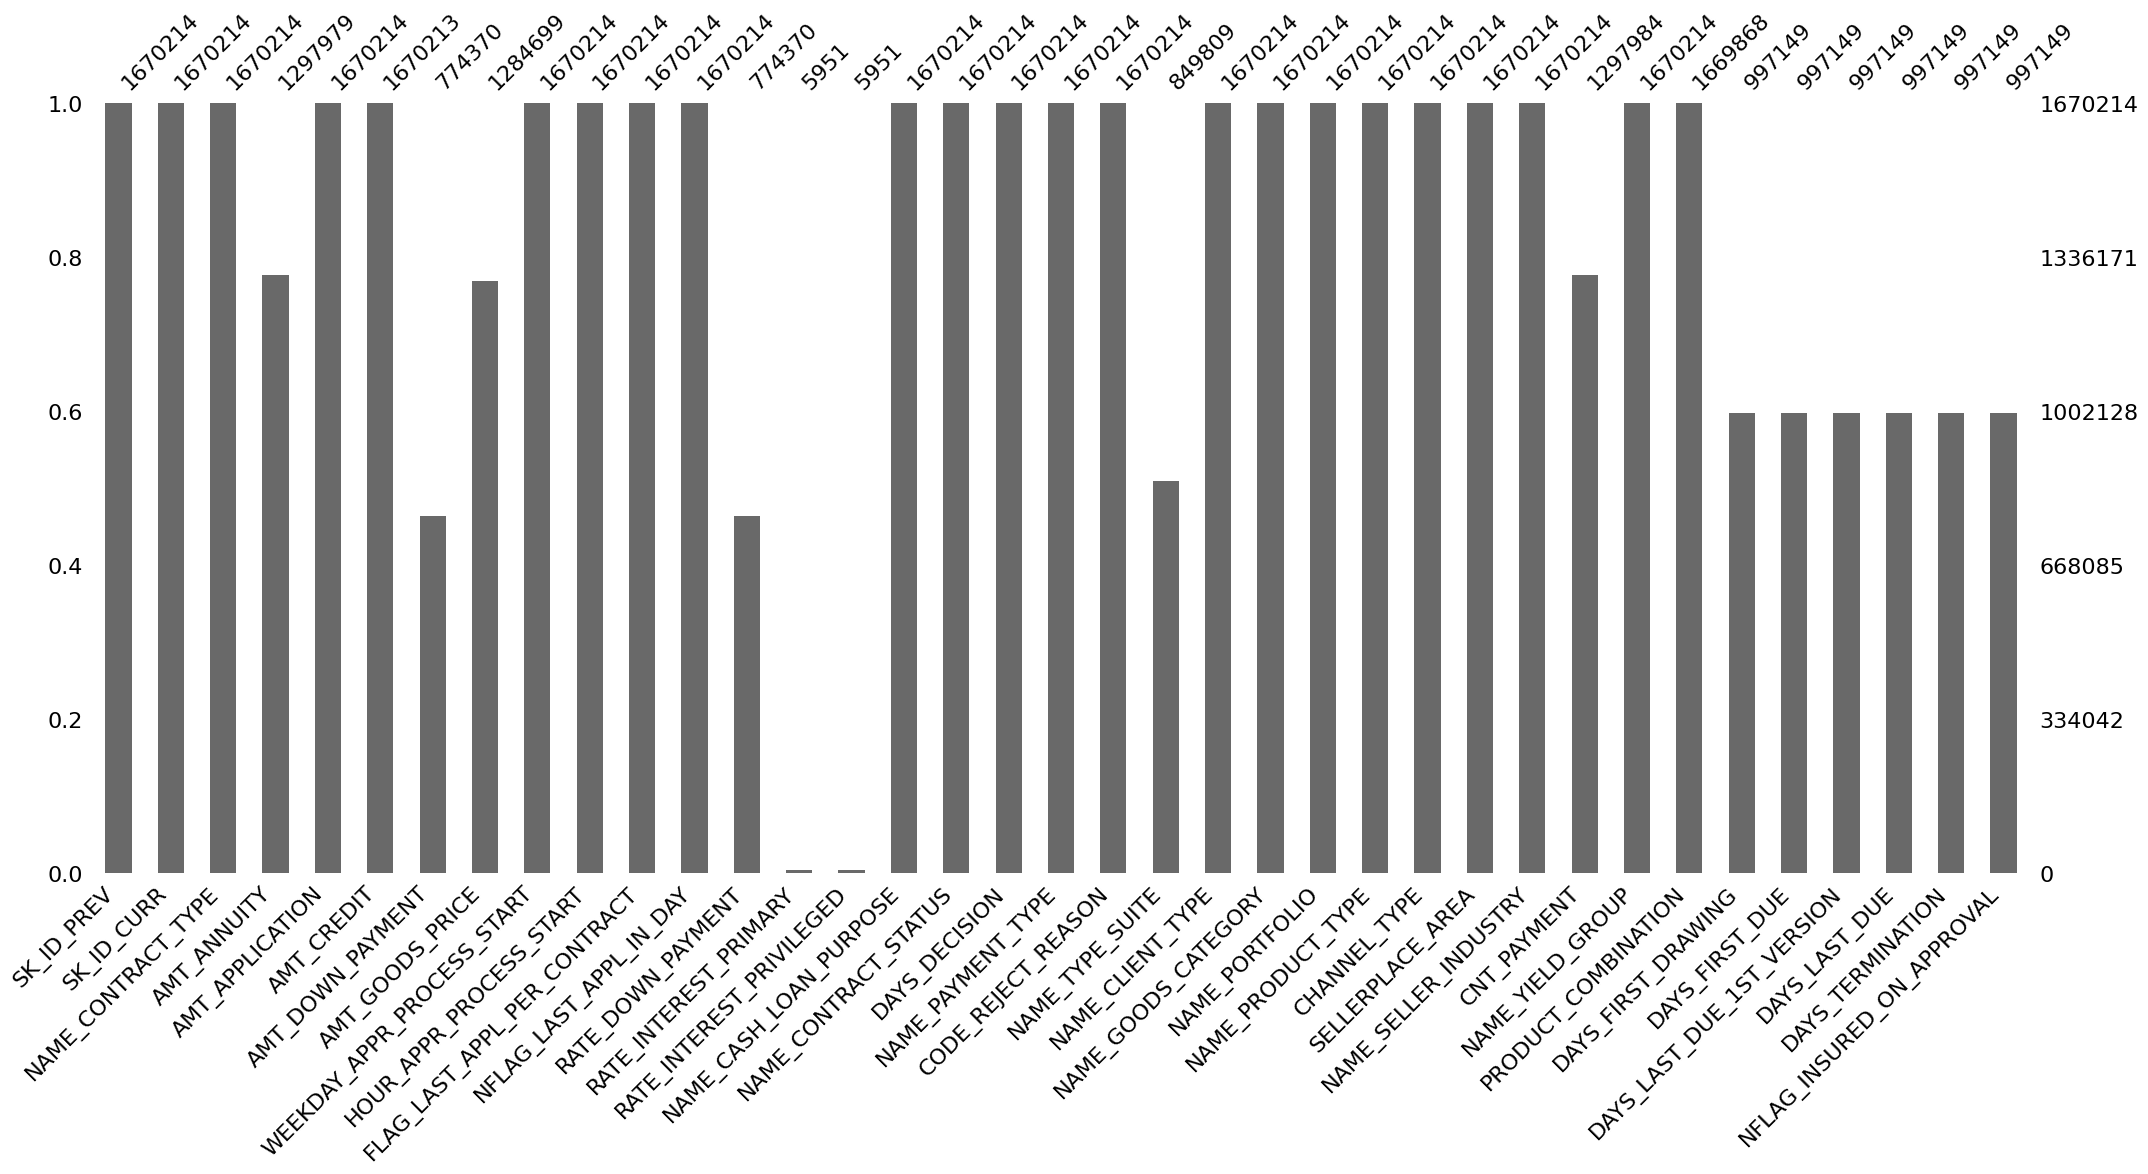

In [273]:
import missingno as msno
msno.bar(prev_app)
plt.show()

TARGET Vs FLAG_DOCUMENT_XX

In [274]:
doc=app_data[['TARGET','FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18', 
'FLAG_DOCUMENT_19', 
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']].corr()

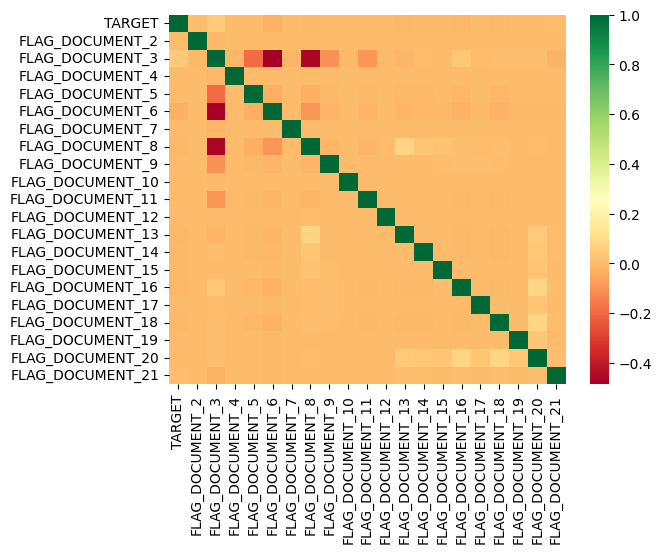

In [275]:
sns.heatmap(data=doc,cmap='RdYlGn')
plt.show()
## This shows there is no correlation between the TARGET and Documents Flag
## So its same to drop them
## Although documents play crucial role in KYC, Initial Loan Processing

FLAG_DOCUMENTS_XX to drop col list

In [276]:
cols = ['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18', 
'FLAG_DOCUMENT_19', 
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']
for i in cols:
    if i not in eda_toolkit.get_cols_to_drop(p_only_col_names=True):
        eda_toolkit.add_cols_to_drop(i,'Due to low correlation to Target Column')

TARGET vs CREDIT BUREAU COLS

In [277]:
cb_enquiries_cols = ['TARGET','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

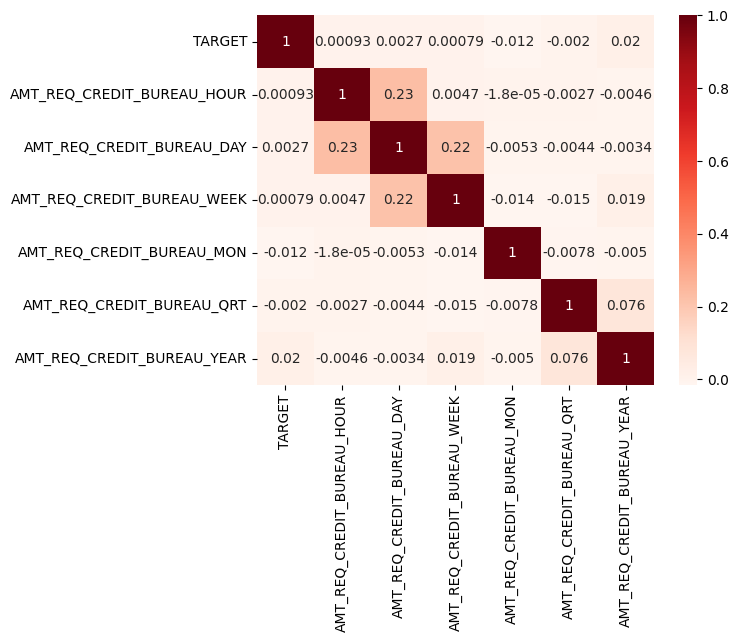

In [278]:
sns.heatmap(app_data[cb_enquiries_cols].corr(),cmap='Reds',annot=True)
plt.show()

## Except AMT_REQ_CREDIT_BUREAU_DAY and AMT_REQ_CREDIT_BUREAU_WEEK rest all are not showing any relation
## Even DAY and Week seems to be having insignificant influence as they have corr() of 0.23 and 0.22

Add Credit Bureau Enquiries to drop columns list

In [279]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in cols:
    if i not in eda_toolkit.get_cols_to_drop():
        eda_toolkit.add_cols_to_drop(i,'Due to low correlation to Target Column')

TARGET Vs CODE_GENER

In [280]:
app_data.groupby('CODE_GENDER')['TARGET'].value_counts()

CODE_GENDER  TARGET
F            0         188278
             1          14170
M            0          94404
             1          10655
XNA          0              4
Name: count, dtype: int64

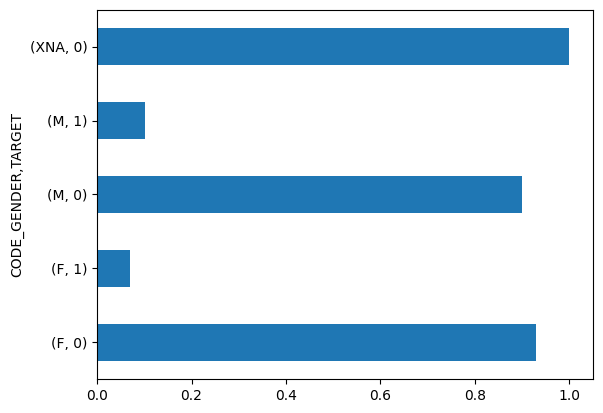

In [281]:
app_data.groupby('CODE_GENDER')['TARGET'].value_counts(normalize=True).plot.barh()
plt.show()

In [282]:
eda_toolkit.get_missing_col_count(app_data,'CNT_CHILDREN')

0

In [283]:
app_data.groupby('CNT_CHILDREN')['TARGET'].value_counts(normalize=True)

CNT_CHILDREN  TARGET
0             0         0.922882
              1         0.077118
1             0         0.910764
              1         0.089236
2             0         0.912782
              1         0.087218
3             0         0.903686
              1         0.096314
4             0         0.871795
              1         0.128205
5             0         0.916667
              1         0.083333
6             0         0.714286
              1         0.285714
7             0         1.000000
8             0         1.000000
9             1         1.000000
10            0         1.000000
11            1         1.000000
12            0         1.000000
14            0         1.000000
19            0         1.000000
Name: proportion, dtype: float64

In [284]:
eda_toolkit.get_missing_col_count(app_data,'AMT_INCOME_TOTAL')

0

In [285]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

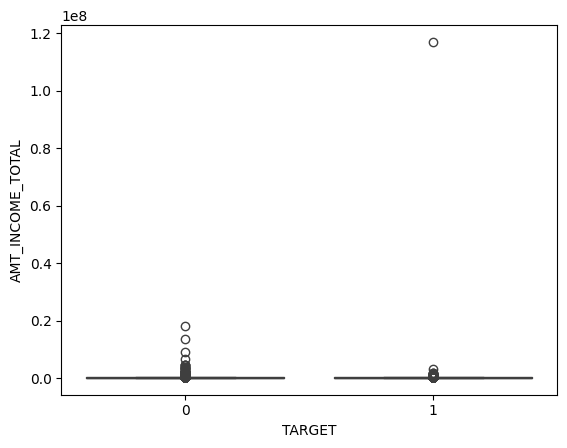

In [286]:
sns.boxplot(app_data,x='TARGET',y='AMT_INCOME_TOTAL')
plt.show()
## We can clearly see the outliers in the AMT_INCOME_TOTAL column

In [287]:
eda_toolkit.get_missing_count(prev_app)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

Lets check missing values in other columns:

In [288]:
# c_threshold = 0.4
missing_cols = []
missing_cols_for_drop = []
for c in app_data.columns:
    if c not in eda_toolkit.get_cols_to_drop():
        if eda_toolkit.get_missing_col_count(app_data,c) > 0:
            if eda_toolkit.get_missing_col_count(app_data,c) > app_data.shape[0] * eda_toolkit.c_threshold:
                missing_cols_for_drop.append(c)
            else:
                missing_cols.append(c)
                

print(f'{len(missing_cols)} - Columns/Features have atleast one missing values - {missing_cols}')
print(f'{len(missing_cols_for_drop)} - Columns/Features that exceeds threshold - {missing_cols_for_drop}')

12 - Columns/Features have atleast one missing values - ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE']
49 - Columns/Features that exceeds threshold - ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTA

See the description of columns with missing exceeding threshold

In [289]:
for c in missing_cols_for_drop:
    print(f'{c}:{eda_toolkit.get_desc('application_data',p_row=c)}')

OWN_CAR_AGE:Age of client's car
EXT_SOURCE_1:Normalized score from external data source
APARTMENTS_AVG:Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
BASEMENTAREA_AVG:Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
YEARS_BEGINEXPLUATATION_AVG:Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
YEARS_BUILD_AVG:Norma

Add them to columns to drop

In [290]:
for c in missing_cols_for_drop:
    eda_toolkit.add_cols_to_drop(c,'Due to Missing Count exceeding threshold')
print('c_threshold',eda_toolkit.c_threshold)

c_threshold 0.4


#### List the columns to drop

In [291]:
eda_toolkit.get_cols_to_drop(p_only_col_names=False)

[('FLAG_DOCUMENT_2', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_3', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_4', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_5', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_6', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_7', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_8', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_9', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_10', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_11', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_12', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_13', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_14', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_15', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_16', 'Due to low correlation to Target Column'),
 ('FLAG_DOCUMENT_1

In [292]:
print(len(eda_toolkit.get_cols_to_drop(p_only_col_names=False)))

75


In [293]:
no_of_col_to_drop = eda_toolkit.get_cols_to_drop()
print(len(no_of_col_to_drop))

75


There are few more FLAG columns Lets see their correlation

In [294]:
other_flag_cols = [i for i in app_data.columns if ('FLAG' in i) and ('FLAG_DOCUMENT_' not in i)]
other_flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [295]:
print(app_data.FLAG_OWN_CAR.nunique())
print(app_data.FLAG_OWN_REALTY.nunique())

2
2


In [296]:
def flag_to_num(p_flag):
    if p_flag == 'Y':
        return 1
    elif p_flag == 'N':
        return 0  

In [297]:
app_data.FLAG_OWN_CAR= app_data.FLAG_OWN_CAR.apply(lambda x: flag_to_num(x))
app_data.FLAG_OWN_REALTY= app_data.FLAG_OWN_REALTY.apply(lambda x: flag_to_num(x))

In [298]:
other_flag_cols.append('TARGET')
app_data[other_flag_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   FLAG_OWN_CAR      307511 non-null  int64
 1   FLAG_OWN_REALTY   307511 non-null  int64
 2   FLAG_MOBIL        307511 non-null  int64
 3   FLAG_EMP_PHONE    307511 non-null  int64
 4   FLAG_WORK_PHONE   307511 non-null  int64
 5   FLAG_CONT_MOBILE  307511 non-null  int64
 6   FLAG_PHONE        307511 non-null  int64
 7   FLAG_EMAIL        307511 non-null  int64
 8   TARGET            307511 non-null  int64
dtypes: int64(9)
memory usage: 21.1 MB


In [299]:
flags = app_data[other_flag_cols].corr()
flags

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_OWN_CAR,1.000000,-0.002817,-0.002512,0.154659,0.011471,-0.006644,-0.007588,0.032105,-0.021851
FLAG_OWN_REALTY,-0.002817,1.000000,-0.001198,-0.070021,-0.114043,0.008526,-0.041507,0.029247,-0.006148
FLAG_MOBIL,-0.002512,-0.001198,1.000000,-0.000845,0.000900,-0.000078,0.001128,0.000442,0.000534
FLAG_EMP_PHONE,0.154659,-0.070021,-0.000845,1.000000,0.233801,-0.012819,-0.016131,0.062542,0.045982
FLAG_WORK_PHONE,0.011471,-0.114043,0.000900,0.233801,1.000000,0.021580,0.293105,-0.011520,0.028524
FLAG_CONT_MOBILE,-0.006644,0.008526,-0.000078,-0.012819,0.021580,1.000000,0.006257,-0.005356,0.000370
FLAG_PHONE,-0.007588,-0.041507,0.001128,-0.016131,0.293105,0.006257,1.000000,0.014657,-0.023806
FLAG_EMAIL,0.032105,0.029247,0.000442,0.062542,-0.011520,-0.005356,0.014657,1.000000,-0.001758
TARGET,-0.021851,-0.006148,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,1.000000


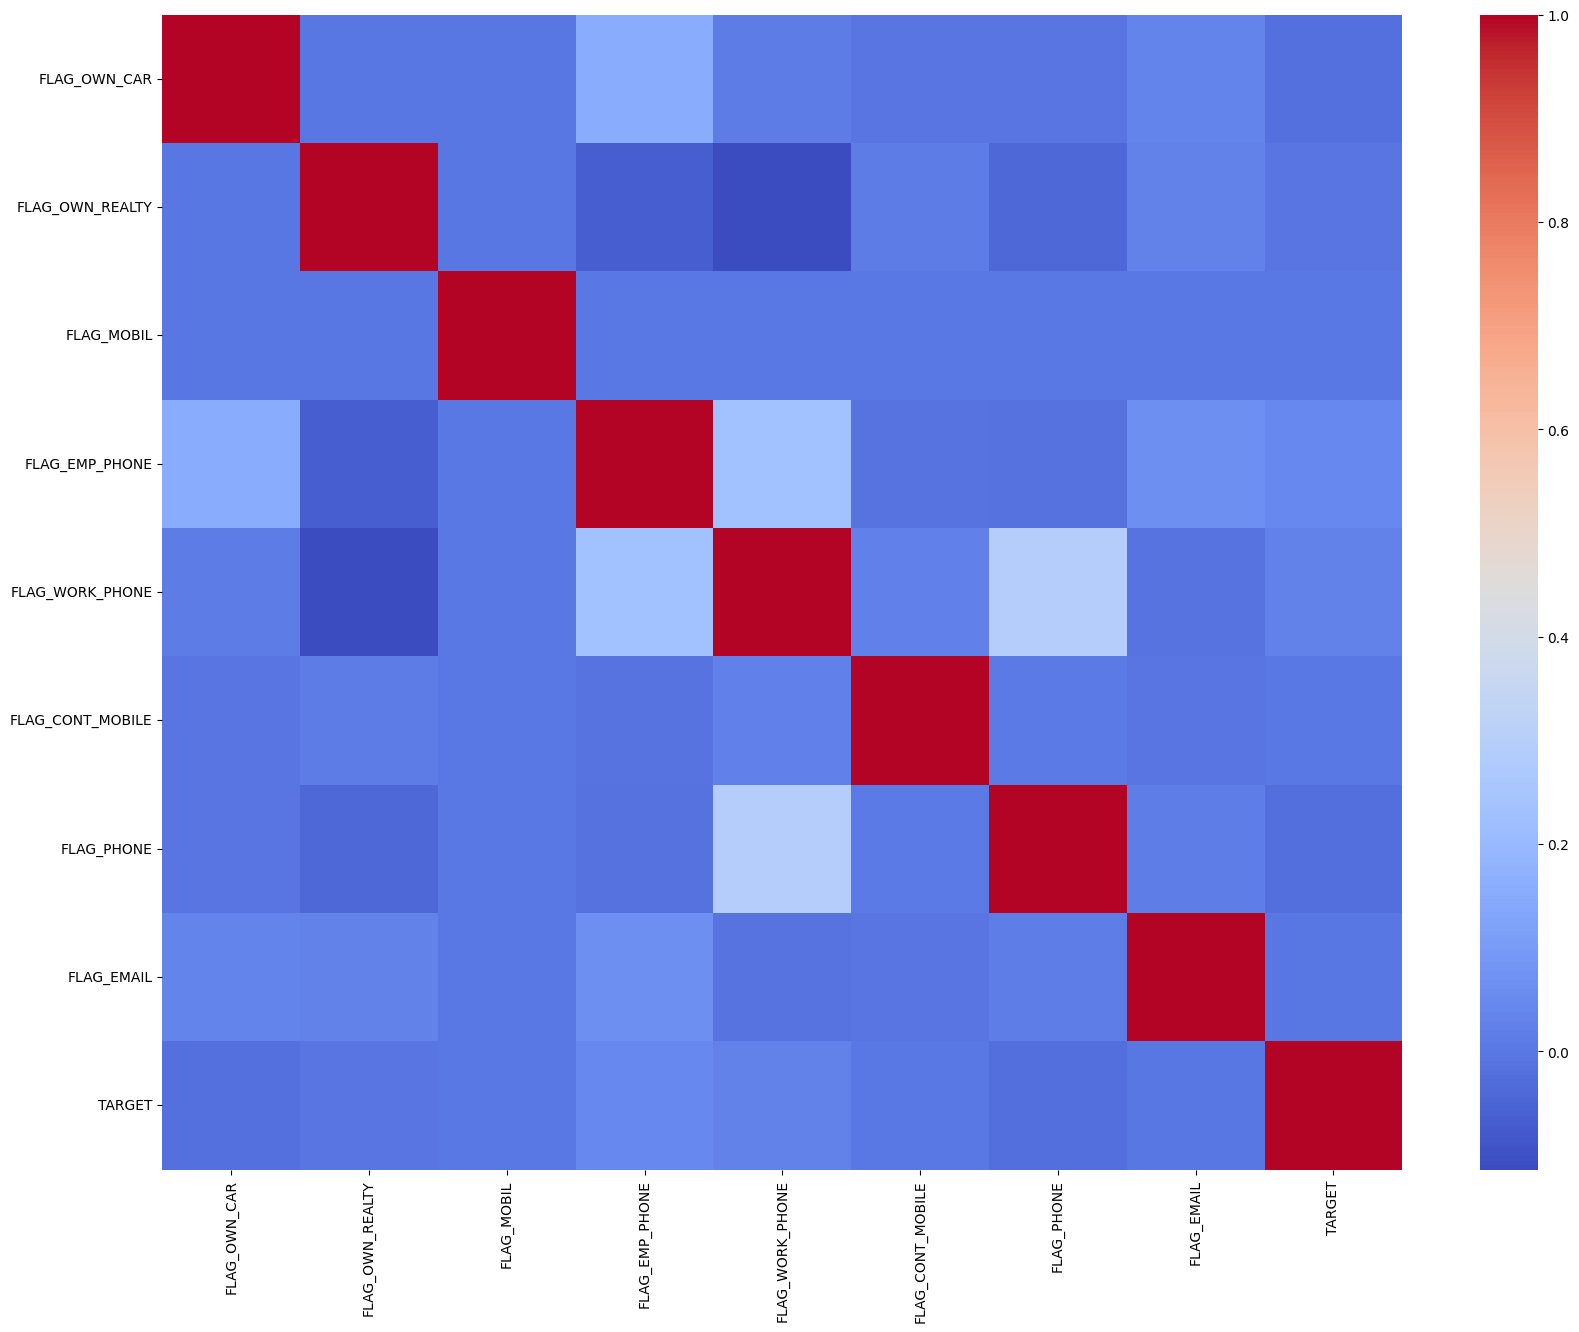

In [300]:
plt.figure(figsize=[20,15])
sns.heatmap(data=flags,cmap='coolwarm')
plt.show()

Due to low correlation flag columns can be marked for drop

In [301]:
cols = ['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']
for i in cols:
    if i not in eda_toolkit.get_cols_to_drop(p_only_col_names=True):
        eda_toolkit.add_cols_to_drop(i,'Due to low correlation to Target Column')

Let see the EXT_SOURCE cols

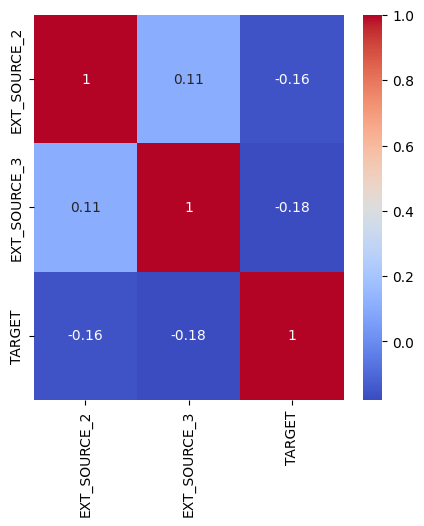

In [302]:
plt.figure(figsize=[5,5])
sns.heatmap(data=app_data[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),cmap='coolwarm',annot=True)
plt.show()

In [303]:
cols = ['EXT_SOURCE_2','EXT_SOURCE_3']
for i in cols:
    if i not in eda_toolkit.get_cols_to_drop(p_only_col_names=True):
        eda_toolkit.add_cols_to_drop(i,'Due to low correlation to Target Column')

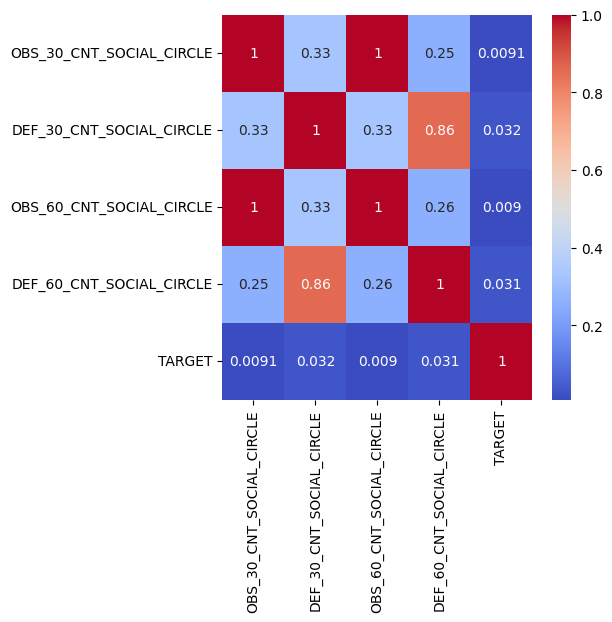

In [304]:
circle_cnt = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','TARGET']
plt.figure(figsize=[5,5])
sns.heatmap(data=app_data[circle_cnt].corr(),cmap='coolwarm',annot=True)
plt.show()

In [305]:
cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
for i in cols:
    if i not in eda_toolkit.get_cols_to_drop(p_only_col_names=True):
        eda_toolkit.add_cols_to_drop(i,'Due to low correlation to Target Column')

### Drop the columns marked for DROP

In [306]:
print(f'Number of columns to drop:{eda_toolkit.get_cols_to_drop()}')

Number of columns to drop:['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', '

In [307]:
app_data.drop(eda_toolkit.get_cols_to_drop(),axis=1, inplace=True)

In [308]:
app_data.shape

(307511, 33)

In [309]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [310]:
eda_toolkit.get_desc_list('application_data',list(app_data.columns))

[('SK_ID_CURR', 'ID of loan in our sample'),
 ('TARGET',
  'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'),
 ('NAME_CONTRACT_TYPE', 'Identification if loan is cash or revolving'),
 ('CODE_GENDER', 'Gender of the client'),
 ('CNT_CHILDREN', 'Number of children the client has'),
 ('AMT_INCOME_TOTAL', 'Income of the client'),
 ('AMT_CREDIT', 'Credit amount of the loan'),
 ('AMT_ANNUITY', 'Loan annuity'),
 ('AMT_GOODS_PRICE',
  'For consumer loans it is the price of the goods for which the loan is given'),
 ('NAME_TYPE_SUITE',
  'Who was accompanying client when he was applying for the loan'),
 ('NAME_INCOME_TYPE',
  'Clients income type (businessman, working, maternity leave,…)'),
 ('NAME_EDUCATION_TYPE', 'Level of highest education the client achieved'),
 ('NAME_FAMILY_STATUS', 'Family status of the client'),
 ('NAME_HOUSING_TYPE',
  'What is the 

In [311]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

### Imputation

In [312]:
app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1292
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
DAYS_ID_PUBLISH                    0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
SK_ID_CURR                         0
DAYS_REGISTRATION                  0
TARGET                             0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
A

`OCCUPATION_TYPE`

In [313]:
app_data.OCCUPATION_TYPE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OCCUPATION_TYPE
Non-Null Count   Dtype 
--------------   ----- 
211120 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [314]:
# % of occupation type missing 31.34 which is below our threshold. 
# So we can proceed with imputation

(app_data.OCCUPATION_TYPE.isnull().sum()/len(app_data)) * 100

31.345545362604916

In [315]:
# Let see the distinct values in the Occupation Type feature
app_data.groupby(app_data.OCCUPATION_TYPE)['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False)


OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

We are having useful information about the profession of the Loan takers.
Lets impute the `OCCUPATION_TYPE` with `Unknown`

In [316]:
app_data.OCCUPATION_TYPE.fillna(eda_toolkit.c_category_unknown,inplace=True)

In [317]:
## Confirm wether `OCCUPATION_TYPE` is imputed

print(eda_toolkit.get_missing_col_count(app_data,'OCCUPATION_TYPE'))

## Print the distinct values
app_data.groupby(app_data.OCCUPATION_TYPE)['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False)

0


OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

`NAME_TYPE_SUITE`

In [318]:
app_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [319]:
app_data.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [320]:
# Lets impute with constant c_category_unknown

app_data.NAME_TYPE_SUITE.fillna(eda_toolkit.c_category_unknown,inplace=True)

In [321]:
# Confirm that its imputed
print(eda_toolkit.get_missing_col_count(app_data,'NAME_TYPE_SUITE'))

0


`AMT_GOODS_PRICE`

In [322]:
app_data.AMT_GOODS_PRICE.isnull().sum()

278

In [323]:
app_data.AMT_GOODS_PRICE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: AMT_GOODS_PRICE
Non-Null Count   Dtype  
--------------   -----  
307233 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [324]:
app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: >

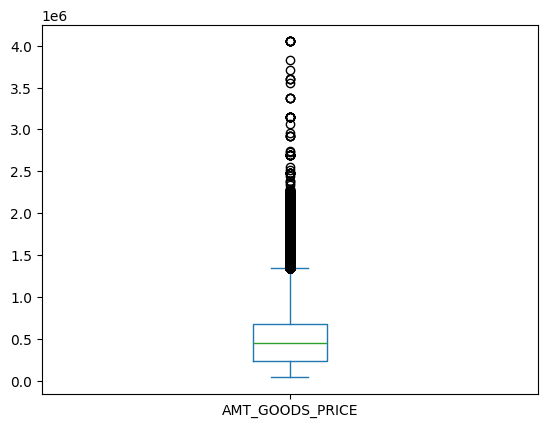

In [325]:
app_data.AMT_GOODS_PRICE.plot.box()

In [326]:
app_data.AMT_GOODS_PRICE.quantile([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0])

0.01      67500.0
0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     373500.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [327]:
app_data.AMT_GOODS_PRICE.mean()

538396.2074288895

In [328]:
app_data.AMT_GOODS_PRICE.mode()

0    450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [329]:
app_data.AMT_GOODS_PRICE.median()

450000.0

In [330]:

app_data[app_data['AMT_GOODS_PRICE']==app_data.AMT_GOODS_PRICE.median()]['AMT_GOODS_PRICE'].value_counts()

AMT_GOODS_PRICE
450000.0    26022
Name: count, dtype: int64

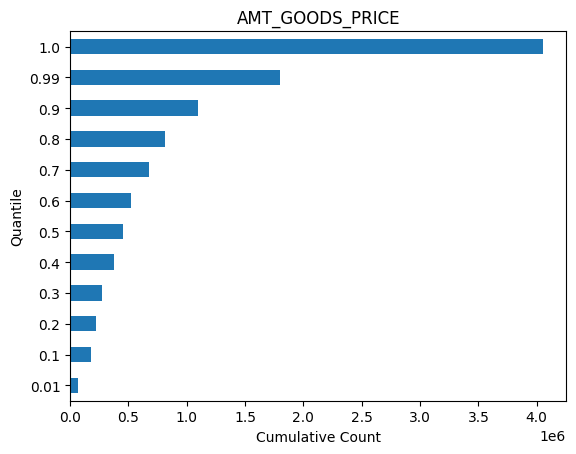

In [331]:
app_data.AMT_GOODS_PRICE.quantile([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0]).plot.barh()
# plt.line(app_data.AMT_GOODS_PRICE)
plt.xlabel('Cumulative Count')
plt.ylabel('Quantile')
plt.title('AMT_GOODS_PRICE')
plt.show()

It means majority of the data points are cluttered in >= 0.99 quantile

So lets impute the `AMT_GOODS_PRICE` with `median`

In [332]:
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(),inplace=True)

In [333]:
# Confirm after imputation
eda_toolkit.get_missing_col_count(app_data,'AMT_GOODS_PRICE')

0

`CNT_FAM_MEMBERS`

In [334]:
# Lets check the count for this variable
app_data.CNT_FAM_MEMBERS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: CNT_FAM_MEMBERS
Non-Null Count   Dtype  
--------------   -----  
307509 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [335]:
app_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [336]:
eda_toolkit.get_missing_col_count(app_data,'CNT_FAM_MEMBERS')

2

In [337]:
app_data.CNT_FAM_MEMBERS.median()

2.0

Lets impute 2 missing values in `CNT_FAM_MEMBERS' with `median`

In [338]:
app_data.CNT_FAM_MEMBERS.fillna(app_data.CNT_FAM_MEMBERS.median(),inplace=True)

In [339]:
# Confirm the imputation
eda_toolkit.get_missing_col_count(app_data,'CNT_FAM_MEMBERS')

0

`DAYS_LAST_PHONE_CHANGE`

In [340]:
eda_toolkit.get_missing_col_count(app_data,'DAYS_LAST_PHONE_CHANGE')

1

In [341]:
app_data.DAYS_LAST_PHONE_CHANGE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: DAYS_LAST_PHONE_CHANGE
Non-Null Count   Dtype  
--------------   -----  
307510 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [342]:
app_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [343]:
app_data.DAYS_LAST_PHONE_CHANGE.mean()

-962.8587883320868

In [344]:
app_data.DAYS_LAST_PHONE_CHANGE.median()

-757.0

<Axes: >

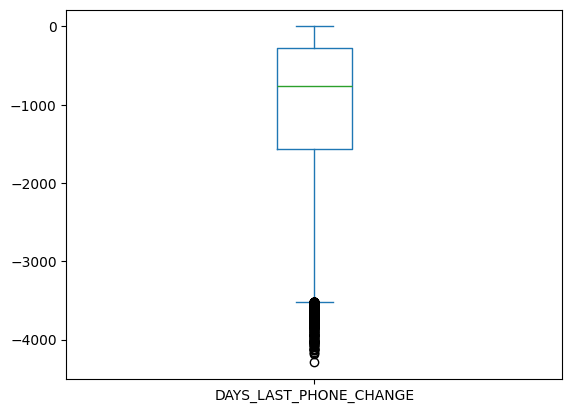

In [345]:
app_data.DAYS_LAST_PHONE_CHANGE.plot.box()

In [346]:
# We can use `median` to impute DAYS_LAST_PHONE_CHANGE
app_data.DAYS_LAST_PHONE_CHANGE.fillna(app_data.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [347]:
# Confirm the imputation
eda_toolkit.get_missing_col_count(app_data,'DAYS_LAST_PHONE_CHANGE')

0

Check for missing values in the data frame app_data

In [348]:
eda_toolkit.get_missing_count(app_data)

AMT_ANNUITY                    12
SK_ID_CURR                      0
REG_REGION_NOT_LIVE_REGION      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_WORK_REGION      0
DAYS_REGISTRATION               0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
DAYS_ID_PUBLISH                 0
DAYS_EMPLOYED                   0
TARGET                          0
DAYS_BIRTH                      0
REGION_POPULATION_RELATIVE      0
NAME_HOUSING_TYPE               0
NAME_FAMILY_STATUS              0
NAME_EDUCATION_TYPE             0
NAME_INCOME_TYPE                0
NAME_TYPE_SUITE                 0
AMT_GOODS_PRICE                 0
AMT_CREDIT                      0
AMT_INCOME_TOTAL                0
CNT_CHILDREN  

## III Data Analysis (50%)


### Meets expectations:

1. The right problem is solved which is coherent with the needs of the business. The analysis has a clear structure and the flow is easy to understand.
2. Univariate and segmented univariate analysis is done correctly and appropriate realistic assumptions are made wherever required. The analyses successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).
3. Business-driven, type-driven and data-driven metrics are created for the important variables and utilised for analysis. The explanation for creating the derived metrics is mentioned and is reasonable.
4. Bivariate analysis is performed correctly and is able to identify the important combinations of driver variables. The combinations of variables are chosen such that they make business or analytical sense.
5. The most useful insights are explained correctly in the comments.
6. Appropriate plots are created to present the results of the analysis. The choice of plots for respective cases is correct. The plots should clearly present the relevant insights and should be easy to read. The axes and important data points are labelled correctly.

### Does not meet expectations:

1. The analyses do not address the right problem or deviate from the business objectives. The analysis lacks a clear structure and is not easy to follow.
2. The univariate and bivariate analysis is not performed in sufficient detail and thus some crucial insights are missed out. The analyses are not able to identify enough important driver variables.
3. New metrics are not derived wherever appropriate. The explanation for creating the derived metrics is either not mentioned or the metrics are not reasonable.
4. Derived metrics are not analysed correctly/are insufficiently utilised.
5. Important insights are not mentioned in the report or the Python file. Relevant plots are not created. The choice of plots is not ideal and the plots are either difficult to interpret or lack clarity or neatness. Relevant insights are not clearly presented by the plots. The axes and important data points are not labelled correctly/neatly.


In [349]:
for col in app_data.columns:
    print(app_data[col].info())

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: SK_ID_CURR
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: TARGET
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: NAME_CONTRACT_TYPE
Non-Null Count   Dtype 
--------------   ----- 
307511 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: CODE_GENDER
Non-Null Count   Dtype 
--------------   ----- 
307511 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: CNT_CHILDREN
Non-Null Count   Dtype
------------

Identify datatypes that are not `float` or `int`

In [350]:
for col in app_data.columns:
    if app_data[col].dtype not in ('int64','float64'):
        eda_toolkit.category_col_list.append(col)
    else:
        if col != 'TARGET':
            eda_toolkit.non_category_col_list.append(col)

See Category Columns

In [351]:
for c in eda_toolkit.category_col_list:
    print(f'{c}:{eda_toolkit.get_desc('application_data',c)}')

NAME_CONTRACT_TYPE:Identification if loan is cash or revolving
CODE_GENDER:Gender of the client
NAME_TYPE_SUITE:Who was accompanying client when he was applying for the loan
NAME_INCOME_TYPE:Clients income type (businessman, working, maternity leave,…)
NAME_EDUCATION_TYPE:Level of highest education the client achieved
NAME_FAMILY_STATUS:Family status of the client
NAME_HOUSING_TYPE:What is the housing situation of the client (renting, living with parents, ...)
OCCUPATION_TYPE:What kind of occupation does the client have
WEEKDAY_APPR_PROCESS_START:On which day of the week did the client apply for the loan
ORGANIZATION_TYPE:Type of organization where client works


See Non Category Columns

In [352]:
for c in eda_toolkit.non_category_col_list:
    print(f'{c}:{eda_toolkit.get_desc('application_data',c)}')

SK_ID_CURR:ID of loan in our sample
CNT_CHILDREN:Number of children the client has
AMT_INCOME_TOTAL:Income of the client
AMT_CREDIT:Credit amount of the loan
AMT_ANNUITY:Loan annuity
AMT_GOODS_PRICE:For consumer loans it is the price of the goods for which the loan is given
REGION_POPULATION_RELATIVE:Normalized population of region where client lives (higher number means the client lives in more populated region)
DAYS_BIRTH:Client's age in days at the time of application
DAYS_EMPLOYED:How many days before the application the person started current employment
DAYS_REGISTRATION:How many days before the application did client change his registration
DAYS_ID_PUBLISH:How many days before the application did client change the identity document with which he applied for the loan
CNT_FAM_MEMBERS:How many family members does client have
REGION_RATING_CLIENT:Our rating of the region where client lives (1,2,3)
REGION_RATING_CLIENT_W_CITY:Our rating of the region where client lives with taking cit

### Univariate Analysis - Categorical Variables

##### `ORGANIZATION TYPE`

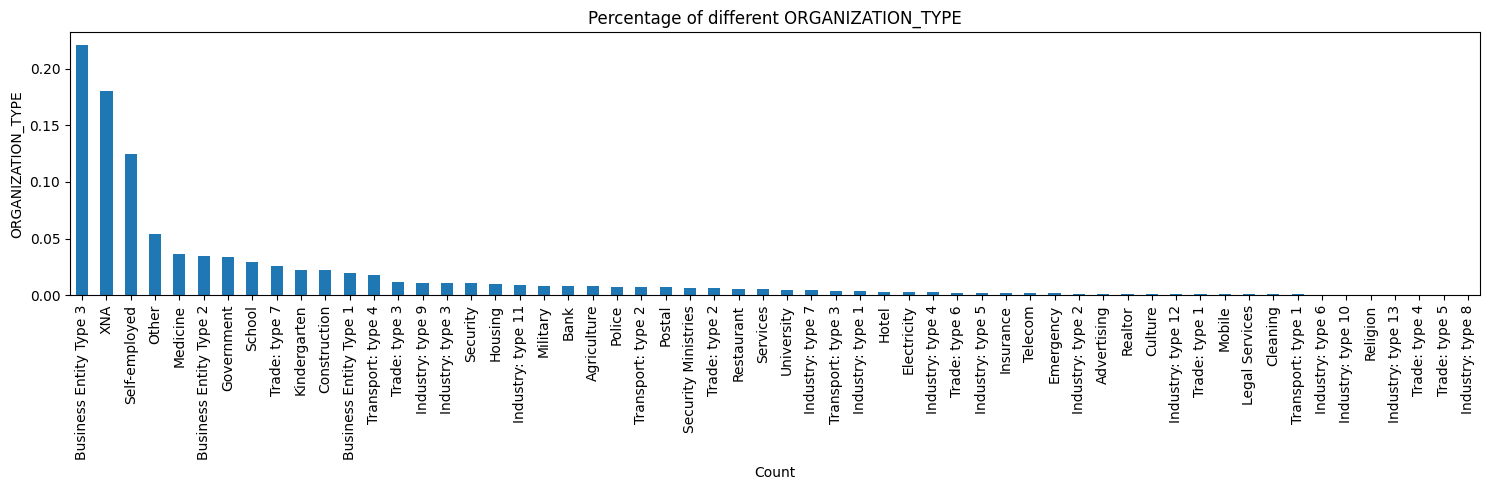

In [353]:
plt.figure(figsize=[15,5])
eda_toolkit.plt_category_count(app_data,'ORGANIZATION_TYPE','v')
plt.tight_layout()
plt.show()

💡 `ORGANIZATION_TYPE` (Type of organization where client works) - Majority of the loan is taken by **Business Entities** with ~25% this is followed by **Self-Employed**

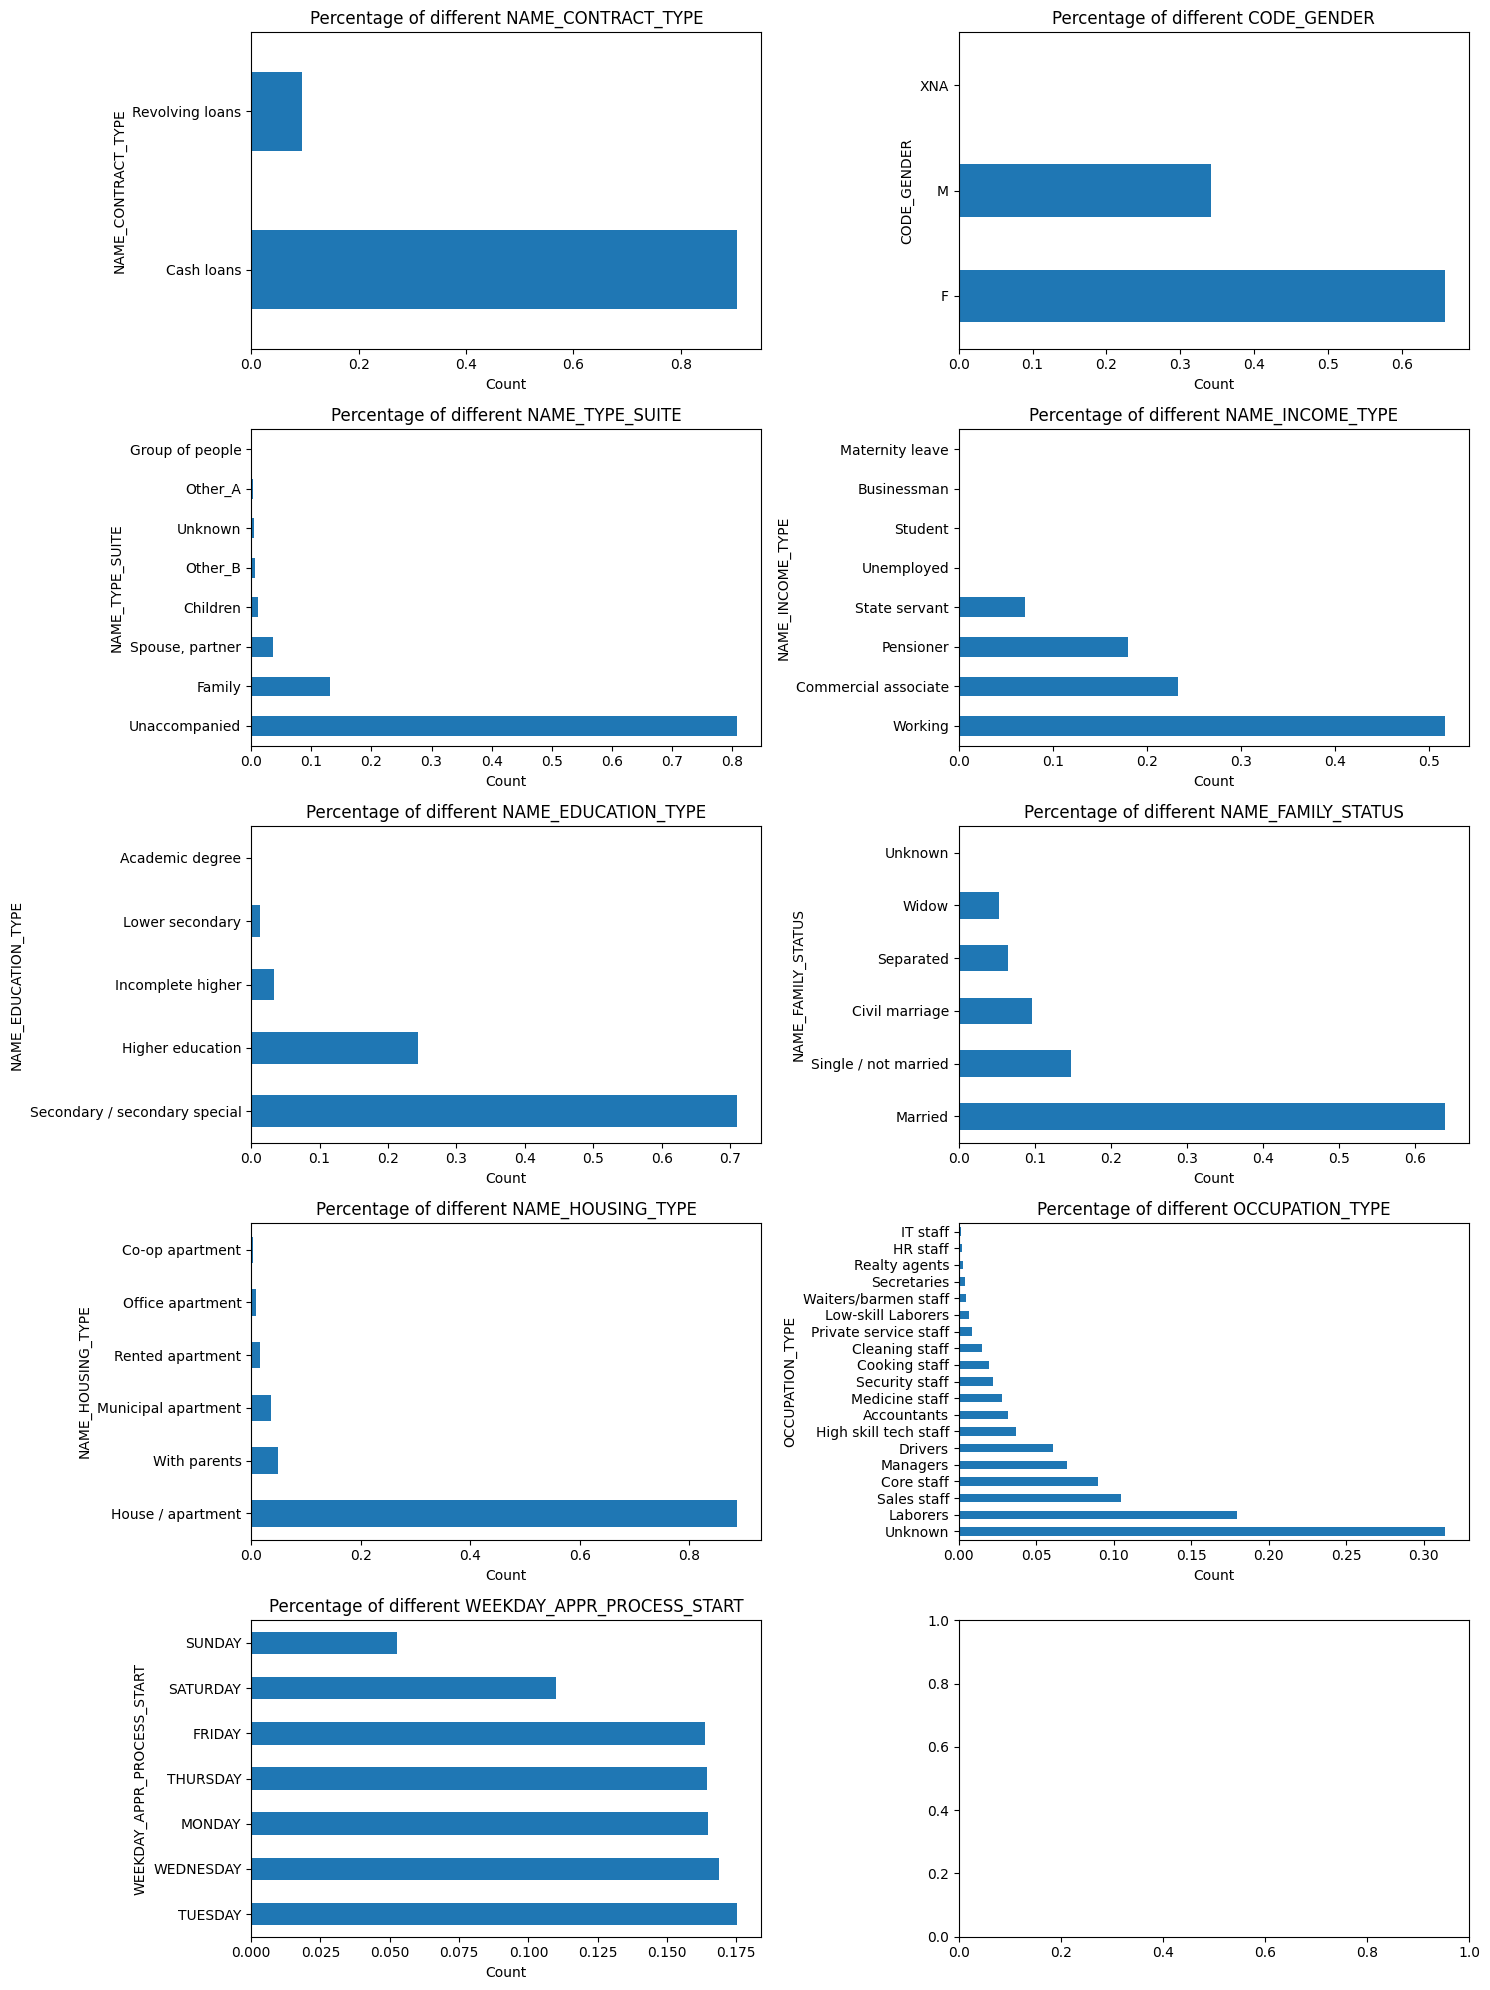

In [354]:
plt.figure(figsize=[15,20])
cnt = 0
for col in eda_toolkit.category_col_list:
    cnt += 1
    # print(col)
    plt.subplot(5,2,cnt)
    if 'ORGANIZATION_TYPE' not in col:
        eda_toolkit.plt_category_count(app_data,col,'h')
plt.tight_layout()
plt.show()        

### 💡Insights from the Univariate Analysis - Categorical Variables

💡`NAME_CONTRACT_TYPE`(Identification if loan is cash or revolving): **Cash Loans** makes the major chunk of loan contract type which is *almost 90%*

💡`CODE_GENDER`(Gender of the client): **Females** are the major loan takers with *> 60%*

💡`NAME_TYPE_SUITE`(Who was accompanying client when he was applying for the loan): *80%* of loanholders were **Unaccompanied** followed by *Family* and then *Spouse, Partners*

💡`NAME_INCOME_TYPE`(Clients income type (businessman, working, maternity leave,…)): Majority of loan holders are **Working** with *>50%*. This is followed by **Commercial** with *25%*

💡`NAME_EDUCATION_TYPE`(Level of highest education the client achieved): 70% of **Secondary/secondary special** taken loan. Which means education is inversely correlated to need for loan 

💡`NAME_FAMILY_STATUS`(Family status of the client): Loan product is popular in the **Married** people with *65%* of have taken loan. 

💡`NAME_HOUSING_TYPE`(What is the housing situation of the client (renting, living with parents, ...)): *80%* of the loan takers are in **Housing/Apartments**

💡`OCCUPATION_TYPE`(What kind of occupation does the client have): *~18%* of Loan is taken by **Laborers** and **IT Staff** makes very less percentage of the loan takers

💡`WEEKDAY_APPR_PROCESS_START`(On which day of the week did the client apply for the loan): **TUESDAY** is the popular day of the week to apply for Loan

🎯 `ORGANIZATION_TYPE` was not fitting the above sub-plot so is already taken care separately


### Bi-Variate Analysis - Categorical Vs Categorial

`ORGANIZATION_TYPE` and `NAME_CONTRACT_TYPE`

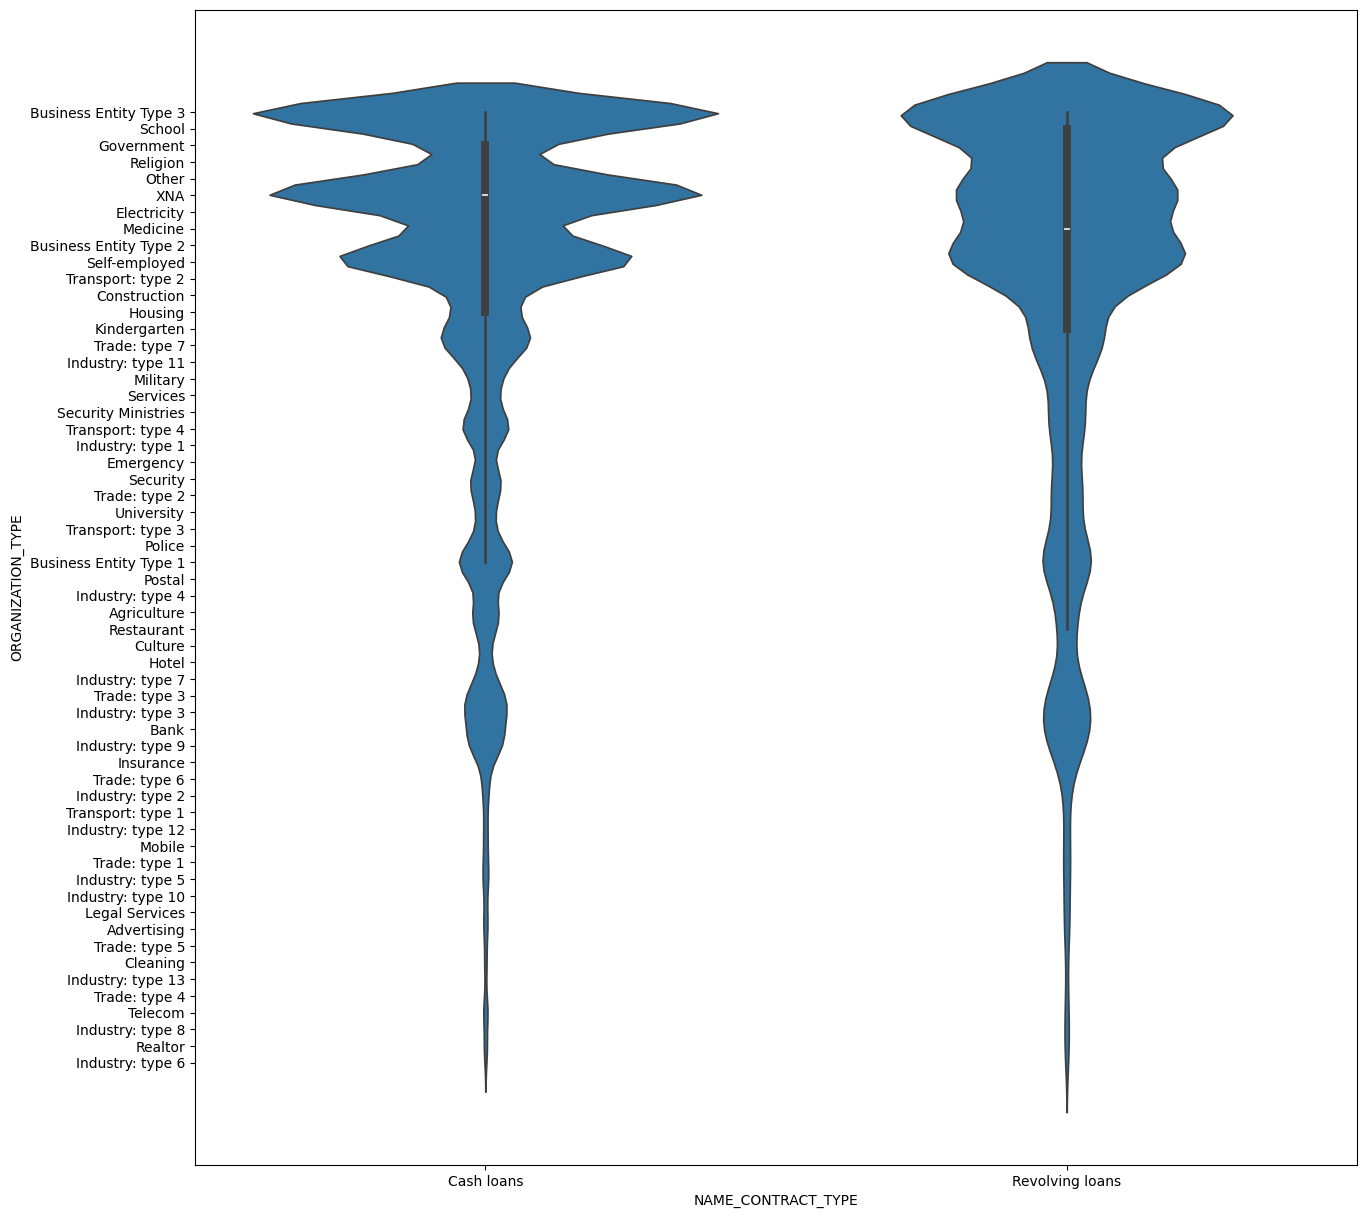

In [355]:
plt.figure(figsize=[15,15])
sns.violinplot(x=app_data.NAME_CONTRACT_TYPE,y=app_data.ORGANIZATION_TYPE)
plt.show()

### 💡Insights from the Bivariate Analysis = Categorical Vs Categorical

💡 Majority of the **Business Entities** favour **Cash loans** than **Revolving loans**. This might be mainly due to the fact that they have to meet their operational expenses month on month basis

### Univariate Analysis - Derived Variables

Lets create convert some Discrete columns of significant importance to Categorical type:

`AMT_INCOME_TOTAL`, `AMT_CREDIT` and `DAYS_BIRTH`, `DAYS_EMPLOYED`

##### `AMT_INCOME_TOTAL`

In [356]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [357]:
col = 'AMT_INCOME_TOTAL'
new_col = col +'_RANGE'
col_range = []
for c in app_data[col].quantile([0,0.2,0.4,0.6,0.8,1]).reset_index()[col]:
    col_range.append(c)

print(col_range)

[25650.0, 99000.0, 135000.0, 162000.0, 225000.0, 117000000.0]


<Axes: >

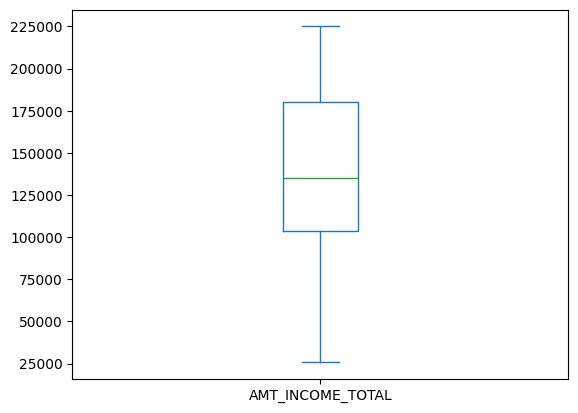

In [358]:
app_data[app_data.AMT_INCOME_TOTAL <= 225000]['AMT_INCOME_TOTAL'].plot.box()

In [359]:
col = 'AMT_INCOME_TOTAL'
new_col = col +'_RANGE'

col_range = [25000.0, 100000.0, 150000.0, 200000.0, 250000.0, 117000000.0]
labels = ['<25K', '25K-100K', '150K-200K', '200K-250K', '>250K']

# Create new column
app_data[new_col] = pd.cut(app_data[col], bins=col_range, labels=labels, include_lowest=True)

# Convert to categorical type
app_data[new_col] = app_data[new_col].astype('category')
app_data[new_col].head()

0    200K-250K
1        >250K
2         <25K
3     25K-100K
4     25K-100K
Name: AMT_INCOME_TOTAL_RANGE, dtype: category
Categories (5, object): ['<25K' < '25K-100K' < '150K-200K' < '200K-250K' < '>250K']

In [360]:
app_data['AMT_INCOME_TOTAL_RANGE'].value_counts()

AMT_INCOME_TOTAL_RANGE
25K-100K     91591
150K-200K    64307
<25K         63698
200K-250K    48137
>250K        39778
Name: count, dtype: int64

<Axes: ylabel='AMT_INCOME_TOTAL_RANGE'>

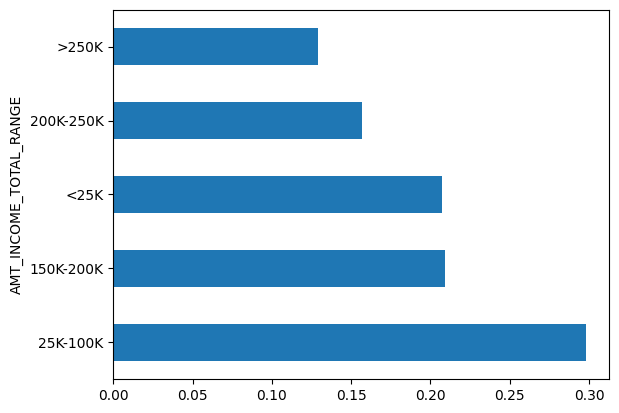

In [361]:
app_data['AMT_INCOME_TOTAL_RANGE'].value_counts(normalize=True).plot.barh()

💡 Close to 30% of the clients have income in the range of 25-100K

##### `AMT_CREDIT`

In [362]:
app_data['AMT_CREDIT'].quantile([0,0.2,0.4,0.6,0.8,1])

0.0      45000.0
0.2     254700.0
0.4     432000.0
0.6     604152.0
0.8     900000.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

In [363]:
col = 'AMT_CREDIT'
new_col = 'AMT_CREDIT_RANGE'
col_range = [0, 100000.0, 250000.0, 500000.0, 750000.0, 1000000.0, 1250000.0, 4050000]
labels = ['<100K','100K-250K', '250K-500K', '500K-750K','750K-1000K', '1000K-1250K', '>1000K']

# Create new column
app_data[new_col] = pd.cut(app_data[col], bins=col_range, labels=labels, include_lowest=True)

# Convert to categorical type
app_data[new_col] = app_data[new_col].astype('category')
app_data[['AMT_CREDIT','AMT_CREDIT_RANGE']].head(10)

,AMT_CREDIT,AMT_CREDIT_RANGE
0,406597.5,250K-500K
1,1293502.5,>1000K
2,135000.0,100K-250K
3,312682.5,250K-500K
4,513000.0,500K-750K
5,490495.5,250K-500K
6,1560726.0,>1000K
7,1530000.0,>1000K
8,1019610.0,1000K-1250K
9,405000.0,250K-500K


<Axes: ylabel='AMT_CREDIT_RANGE'>

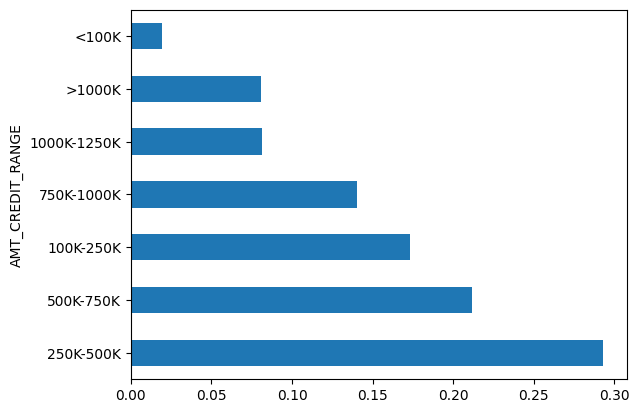

In [364]:
app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True).plot.barh()

💡 29% of the clients are in the loan bracket of 250K-500K CREDIT AMOUNT

##### `DAYS_BIRTH` -> `AGE`

In [365]:
col = 'DAYS_BIRTH'
new_col = 'AGE'
app_data[new_col] = app_data[col].apply(lambda x: round((abs(x)/365)))
app_data[new_col].head()

0    26
1    46
2    52
3    52
4    55
Name: AGE, dtype: int64

In [366]:
app_data.AGE.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

<Axes: >

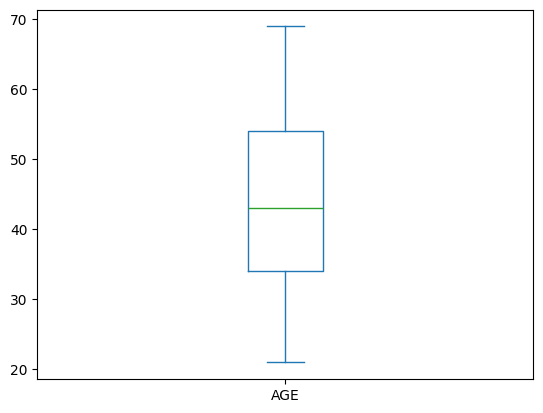

In [367]:
app_data.AGE.plot.box()

###### `AGE` -> `AGE_RANGE`

In [368]:
col = 'AGE'
new_col = 'AGE_RANGE'
col_range = [20,30,40,50,60,100]
labels = ['20-30','30-40','40-50','50-60','>60']

app_data[new_col] = pd.cut(app_data[col], bins=col_range, labels=labels, include_lowest=True)

# Convert to categorical type
app_data[new_col] = app_data[new_col].astype('category')
app_data[new_col].head()

0    20-30
1    40-50
2    50-60
3    50-60
4    50-60
Name: AGE_RANGE, dtype: category
Categories (5, object): ['20-30' < '30-40' < '40-50' < '50-60' < '>60']

In [369]:
app_data['AGE_RANGE'].value_counts(normalize=True)

AGE_RANGE
30-40    0.269161
40-50    0.245549
50-60    0.220984
20-30    0.158918
>60      0.105388
Name: proportion, dtype: float64

<Axes: ylabel='AGE_RANGE'>

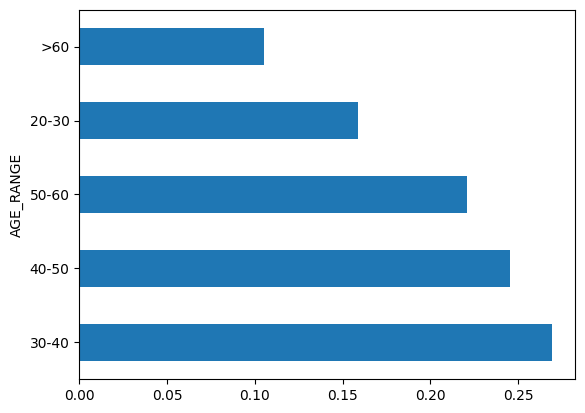

In [370]:
app_data['AGE_RANGE'].value_counts(normalize=True).plot.barh()

💡 30-40 is the popular age group for people applying for loans. Although 40-50 and 50-60 seems to be age group followed by it

##### `DAYS_EMPLOYED` -> `MONTHS_EMPLOYED`

In [371]:
col = 'DAYS_EMPLOYED'
new_col = 'MONTHS_EMPLOYED'
app_data[new_col] = app_data[col].apply(lambda x: round((abs(x)/365*12)))
app_data[new_col].head()


0     21
1     39
2      7
3    100
4    100
Name: MONTHS_EMPLOYED, dtype: int64

In [372]:
app_data['MONTHS_EMPLOYED'].describe()

count    307511.000000
mean       2226.569072
std        4584.456264
min           0.000000
25%          31.000000
50%          73.000000
75%         188.000000
max       12008.000000
Name: MONTHS_EMPLOYED, dtype: float64

In [373]:
app_data['MONTHS_EMPLOYED'].quantile([0,0.2,0.4,0.6,0.7,0.8,0.85,0.9,1])

0.00        0.0
0.20       25.0
0.40       53.0
0.60      100.0
0.70      146.0
0.80      302.0
0.85    12008.0
0.90    12008.0
1.00    12008.0
Name: MONTHS_EMPLOYED, dtype: float64

<Axes: >

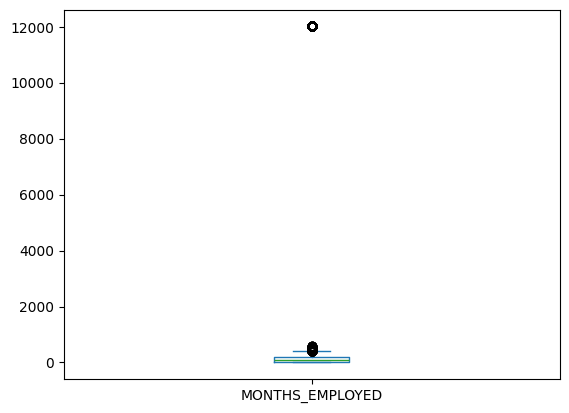

In [374]:
app_data['MONTHS_EMPLOYED'].plot.box()

In [375]:
col = 'MONTHS_EMPLOYED'
new_col = 'MONTHS_EMPLOYED_RANGE'

col_range = [0,25,50,75,100,150,300,13000]
labels = ['<25','25-50','50-75','75-100','100-150','150-300','>300']

app_data[new_col] = pd.cut(app_data[col], bins=col_range, labels=labels, include_lowest=True)

# Convert to categorical type
app_data[new_col] = app_data[new_col].astype('category')
app_data[new_col].head()

0       <25
1     25-50
2       <25
3    75-100
4    75-100
Name: MONTHS_EMPLOYED_RANGE, dtype: category
Categories (7, object): ['<25' < '25-50' < '50-75' < '75-100' < '100-150' < '150-300' < '>300']

In [376]:
app_data['MONTHS_EMPLOYED_RANGE'].value_counts(normalize=True)

MONTHS_EMPLOYED_RANGE
<25        0.207209
>300       0.200490
25-50      0.180342
50-75      0.123352
100-150    0.104360
150-300    0.092589
75-100     0.091659
Name: proportion, dtype: float64

<Axes: ylabel='MONTHS_EMPLOYED_RANGE'>

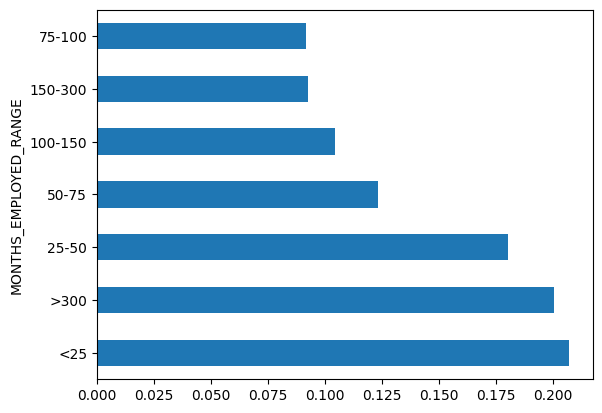

In [377]:
app_data['MONTHS_EMPLOYED_RANGE'].value_counts(normalize=True).plot.barh()

💡 Clients who are employed for less number of months (`<25` and `<25-50`) clearly shows were loan applicants

💡 Contrarily clients employed for `>300` months were high in number with 20%

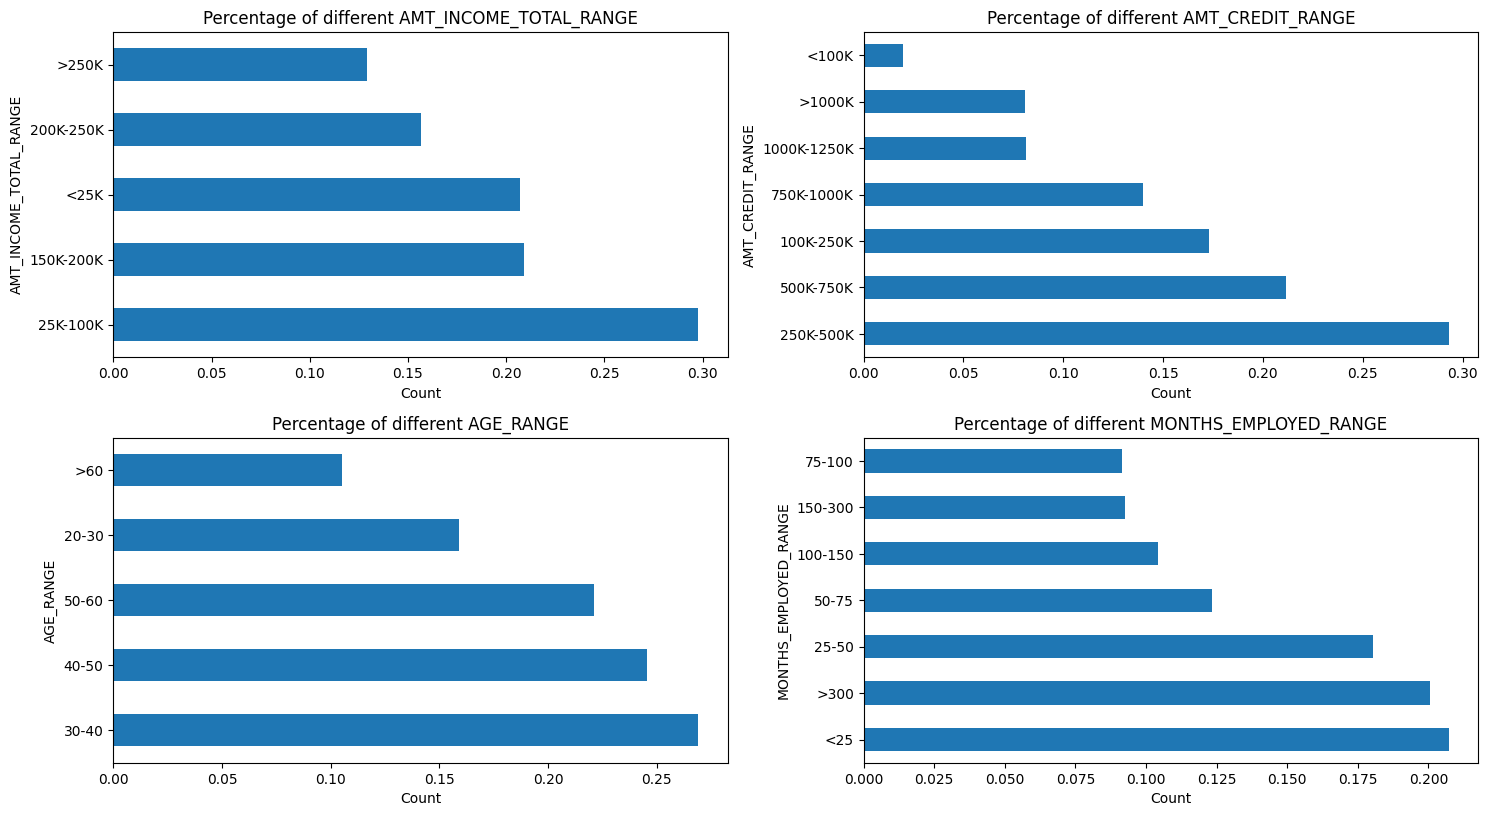

In [378]:
col_list = ['AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AGE_RANGE', 'MONTHS_EMPLOYED_RANGE']
plt.figure(figsize=[15,20])
cnt = 0
for col in col_list:
    cnt += 1
    # print(col)
    plt.subplot(5,2,cnt)
    eda_toolkit.plt_category_count(app_data,col,'h')
plt.tight_layout()
plt.show()        

### 💡 Insights of Univariate Analysis - Derived Column

💡 `AMT_INCOME_TOTAL_RANGE`: Close to 30% of the clients have income in the range of 25-100K

💡 `AMT_CREDIT_RANGE`: 29% of the clients are in the loan bracket of 250K-500K CREDIT AMOUNT

💡 `AGE_RANGE`: `30-40` is the popular age group for people applying for loans. Additionally `40-50` and `50-60` seems to be age group followed by it

💡 `MONTHS_EMPLOYED_RANGE`: Clients who are employed for less number of months (`<25` and `<25-50`) clearly shows were loan applicants, Contrarily clients employed for `>300` months were high in number with 20%

### Bi-Variate/Multi-Variate Analysis - Discrete vs Discrete

In [379]:
eda_toolkit.non_category_col_list.append('TARGET')    
for c in eda_toolkit.non_category_col_list:
    print(f'{c}:{eda_toolkit.get_desc('application_data',c)}')

SK_ID_CURR:ID of loan in our sample
CNT_CHILDREN:Number of children the client has
AMT_INCOME_TOTAL:Income of the client
AMT_CREDIT:Credit amount of the loan
AMT_ANNUITY:Loan annuity
AMT_GOODS_PRICE:For consumer loans it is the price of the goods for which the loan is given
REGION_POPULATION_RELATIVE:Normalized population of region where client lives (higher number means the client lives in more populated region)
DAYS_BIRTH:Client's age in days at the time of application
DAYS_EMPLOYED:How many days before the application the person started current employment
DAYS_REGISTRATION:How many days before the application did client change his registration
DAYS_ID_PUBLISH:How many days before the application did client change the identity document with which he applied for the loan
CNT_FAM_MEMBERS:How many family members does client have
REGION_RATING_CLIENT:Our rating of the region where client lives (1,2,3)
REGION_RATING_CLIENT_W_CITY:Our rating of the region where client lives with taking cit

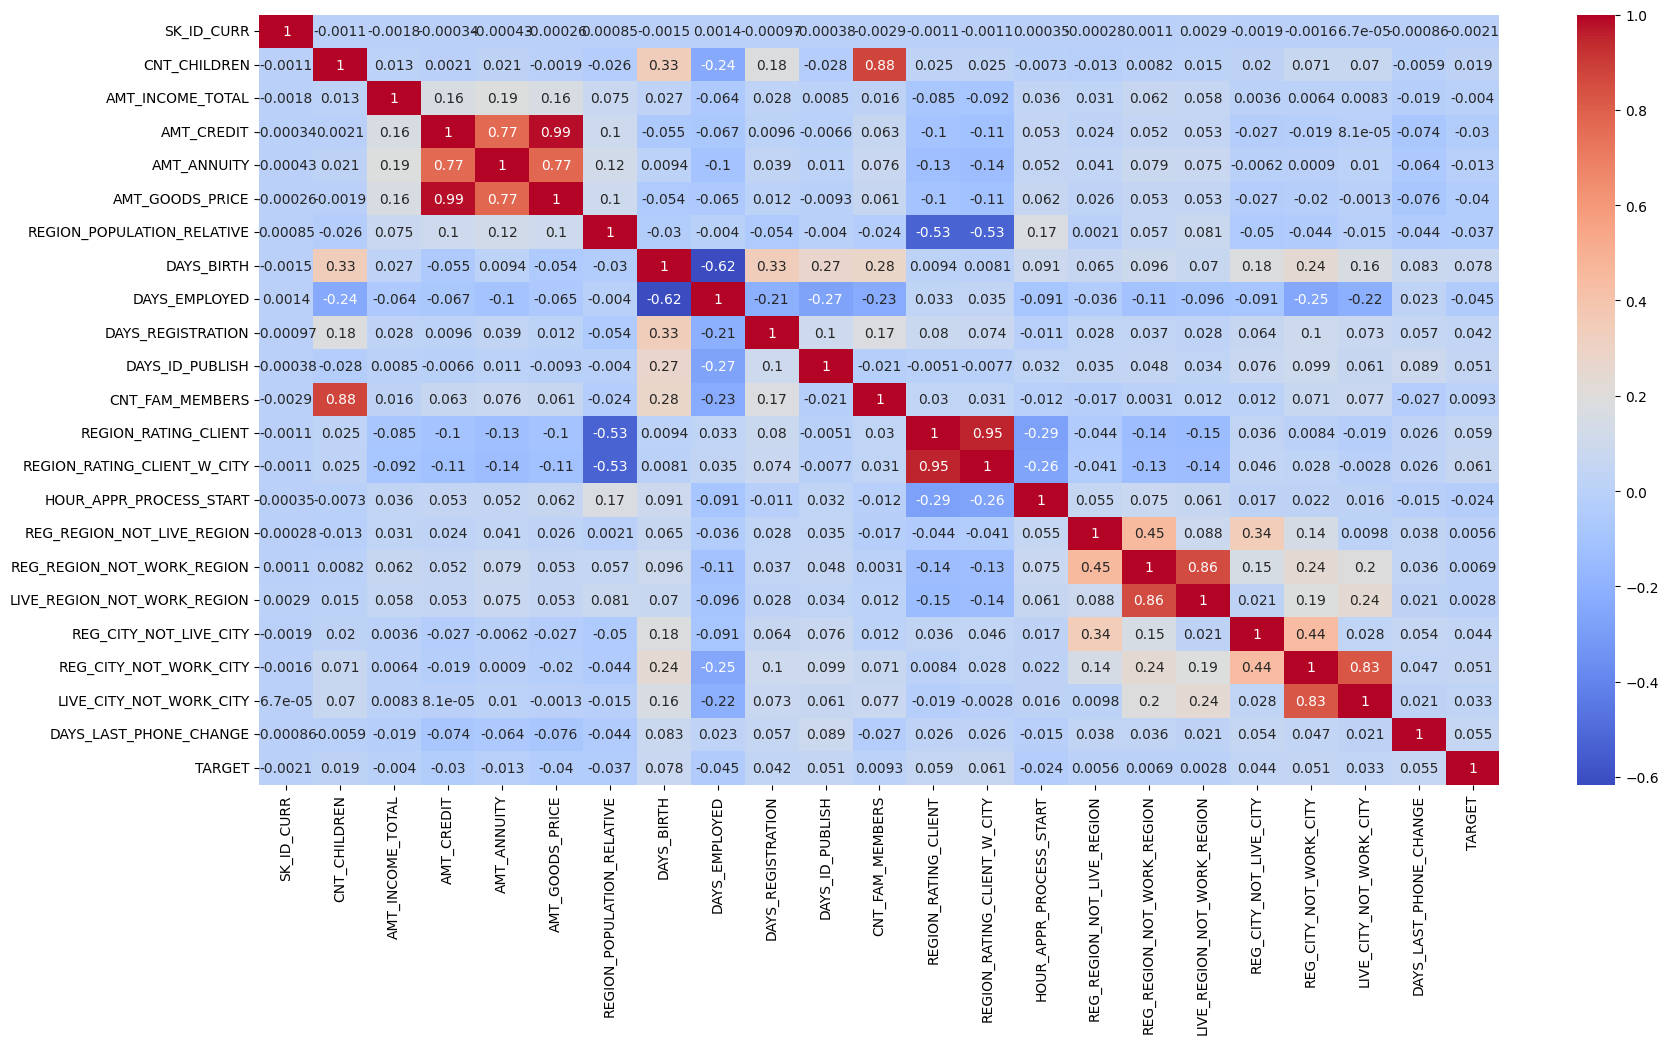

In [380]:
plt.figure(figsize=[20,10])
sns.heatmap(app_data[eda_toolkit.non_category_col_list].corr(),cmap='coolwarm',annot=True)
plt.show()

### 💡 Insights of Bi-Variate/Multi-Variate Analysis - Discrete vs Discrete
💡 `CNT_FAM_MEMBERS` and `CNT_CHILDREN` - are highly correlated which means number family are big due to number of children

💡 `LIVE_REGION_NOT_WORK_REGION` and`REG_REGION_NOT_WORK_REGION` - Most of the loans are taken by people who are working away from their permanent location

💡 `LIVE_REGION_NOT_WORK_CITY` and`REG_REGION_NOT_WORK_CITY` - Most of the loans are taken by people who are working away from their permanent city altogether

💡 `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `AMT_GOODS_PRICE` - Income of Client, Loan Amount and  Price of Goods (in case of consumer goods) are showing high positive correlation.

💡 `REGION_RATING_CLIENT` is inversely correlated to the `REGION_POPULATION_RELATIVE` - This means **residents of highly populated region are more likely to take Loan** Product. Same is the case with `REGION_RATING_W_CITY` and `REGION_POPULATION_RELATIVE`

### Multi-Variate Analysis - Categorical Vs Non-Category

In [381]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE',
       'AGE', 'AGE_RANGE', 'MONTHS_EMPLOYED', 'MONTHS_EMPLOYED_RANGE'],
      dtype='object')

#### Derived Column - CLIENT_TYPE

In [382]:
app_data['CLIENT_TYPE']=app_data['TARGET'].replace({1:'Having payment difficulties',0:'Other Cases'})

In [383]:
app_data.CLIENT_TYPE.value_counts(normalize=True)

CLIENT_TYPE
Other Cases                    0.919271
Having payment difficulties    0.080729
Name: proportion, dtype: float64

#### Gender Vs Credit Vs Target

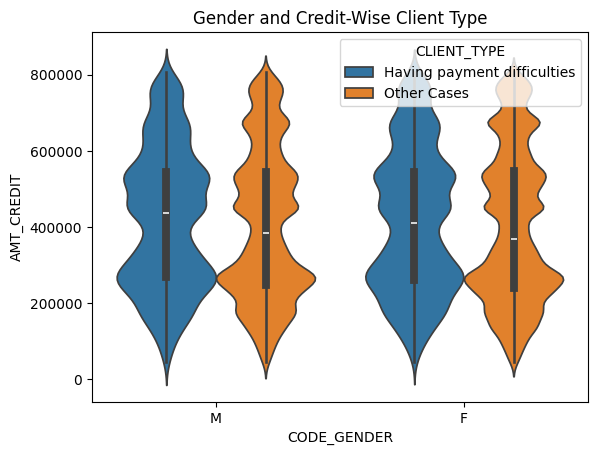

In [384]:
income_outlier = app_data.AMT_CREDIT.quantile([0.75]).reset_index()['AMT_CREDIT'][0]
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','TARGET','CLIENT_TYPE','CODE_GENDER']
data1 = app_data[(app_data.AMT_CREDIT < income_outlier) & (app_data.CODE_GENDER != 'XNA')]
sns.violinplot(data=data1,x='CODE_GENDER',y='AMT_CREDIT',hue='CLIENT_TYPE')
plt.title('Gender and Credit-Wise Client Type')
plt.show()

💡 Both Male and Female are showing identifical pattern in the payment difficulties and other cases. Although the median for payment difficulties in case of Female is on the lower side and proportion to their overall median.

#### Income Vs Gender Vs Target

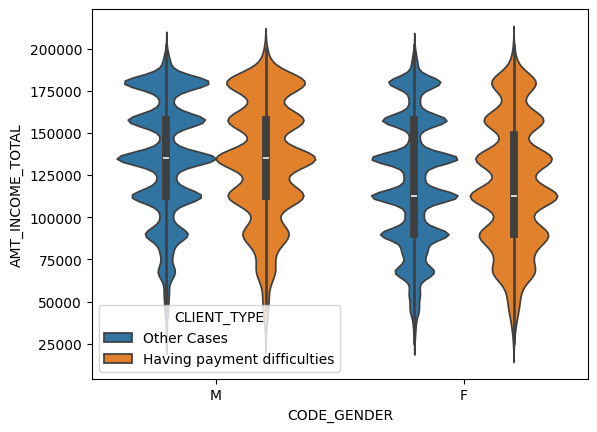

In [385]:
income_outlier = app_data.AMT_INCOME_TOTAL.quantile([0.75]).reset_index()['AMT_INCOME_TOTAL'][0]
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','TARGET','CLIENT_TYPE','CODE_GENDER']
data1 = app_data[(app_data.AMT_INCOME_TOTAL < income_outlier) & (app_data.CODE_GENDER != 'XNA')]
sns.violinplot(data=data1,x='CODE_GENDER',y='AMT_INCOME_TOTAL',hue='CLIENT_TYPE')
plt.show()

💡 Majority of `FEMALES` are having payment difficulties in the income bracket `100K to 125K` which aligns to the median as well

💡 Similarly Majority of `MALES` are having payment difficulties in the income bracket `125K to 150K` which aligns to their median as well

In [386]:
defaulters_data = app_data[app_data['TARGET']==1]

## Defaulters Dataset

### Univariate Analysis on Defaulters Dataset

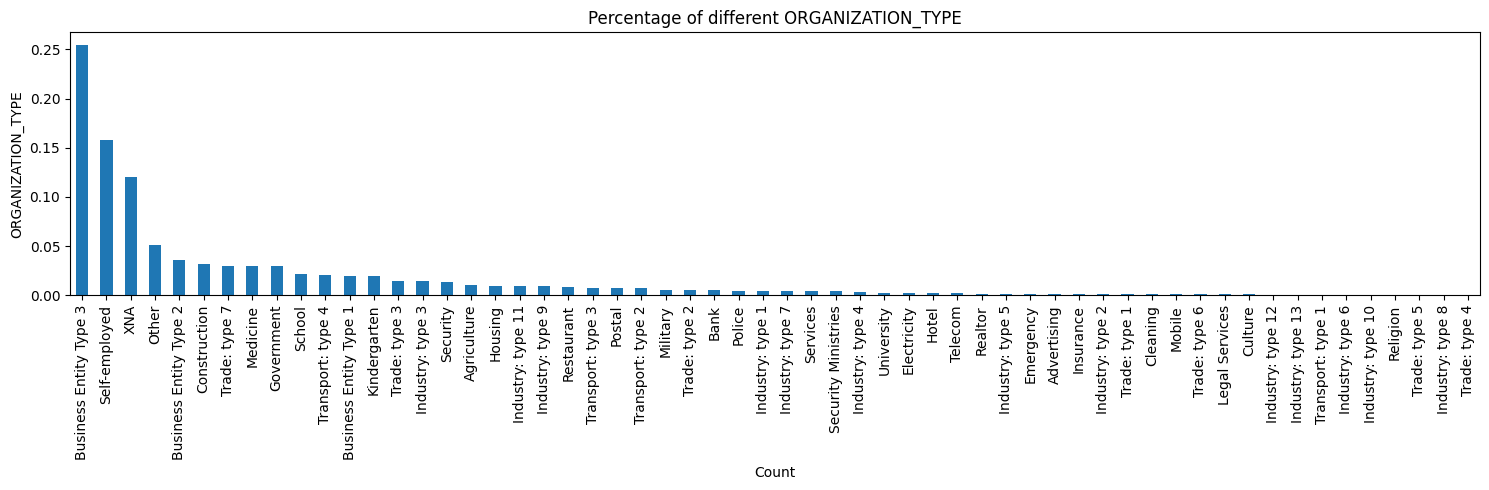

In [387]:
plt.figure(figsize=[15,5])
eda_toolkit.plt_category_count(defaulters_data,'ORGANIZATION_TYPE','v')
plt.tight_layout()
plt.show()

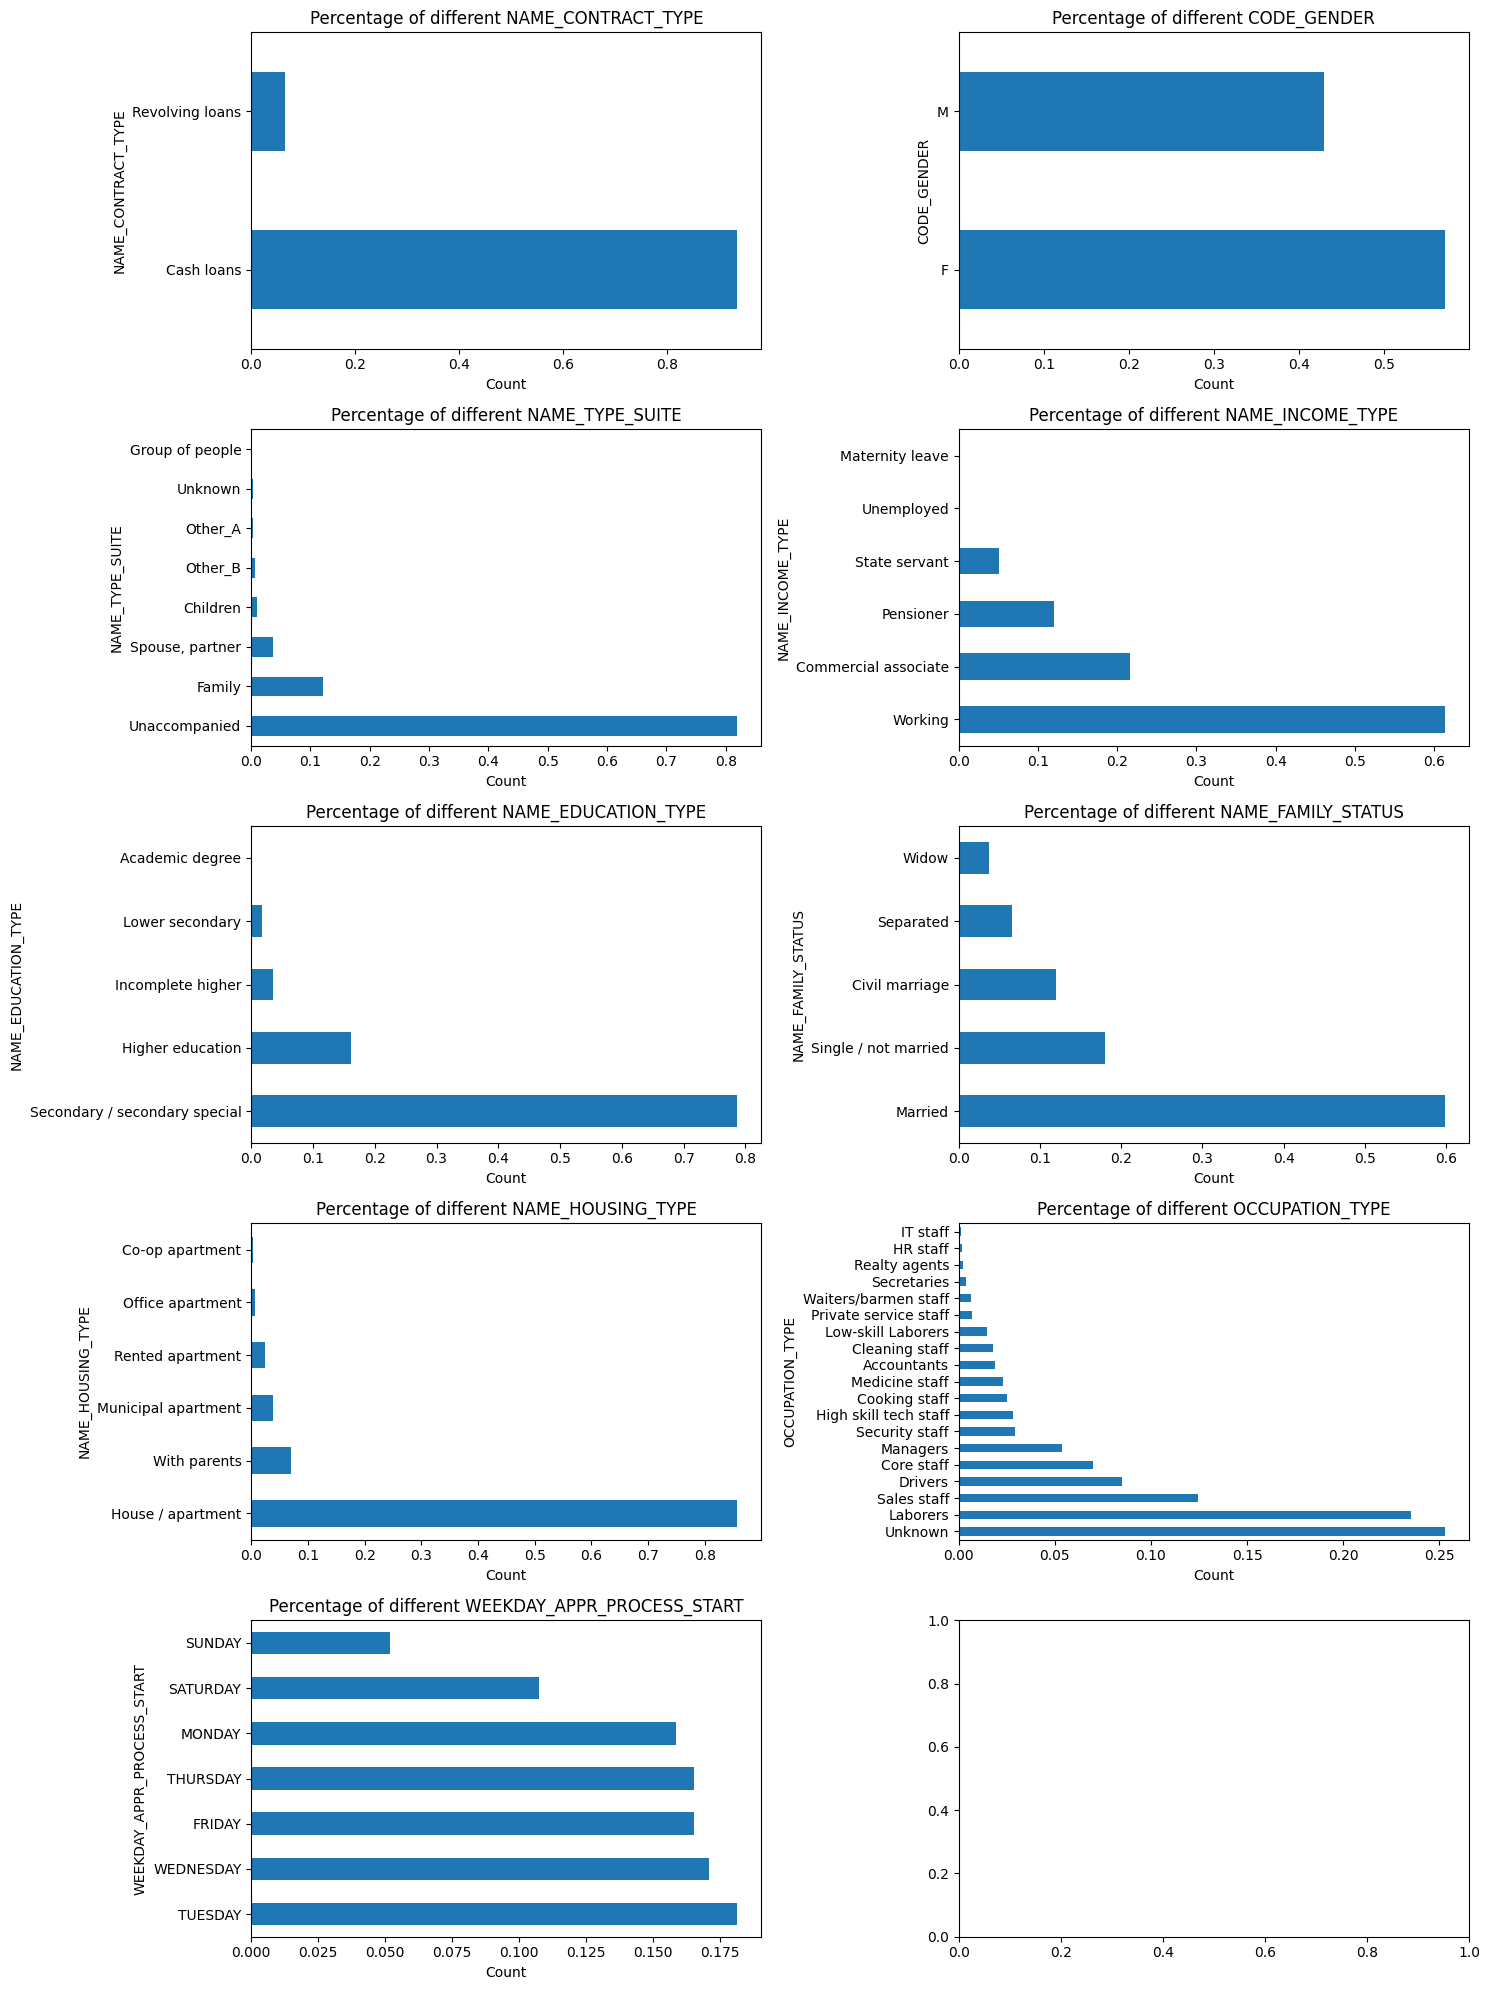

In [388]:
plt.figure(figsize=[15,20])
cnt = 0
for col in eda_toolkit.category_col_list:
    cnt += 1
    # print(col)
    plt.subplot(5,2,cnt)
    if 'ORGANIZATION_TYPE' not in col:
        eda_toolkit.plt_category_count(defaulters_data,col,'h')
plt.tight_layout()
plt.show()        

#### Lets check for OCCUPATION_TYPE and AMT_CREDIT

In [389]:
defaulters_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE',
       'AGE', 'AGE_RANGE', 'MONTHS_EMPLOYED', 'MONTHS_EMPLOYED_RANGE',
       'CLIENT_TYPE'],
      dtype='object')

 💡 Majority of defaulters are having 2 members in Family

### Defaulters Pattern

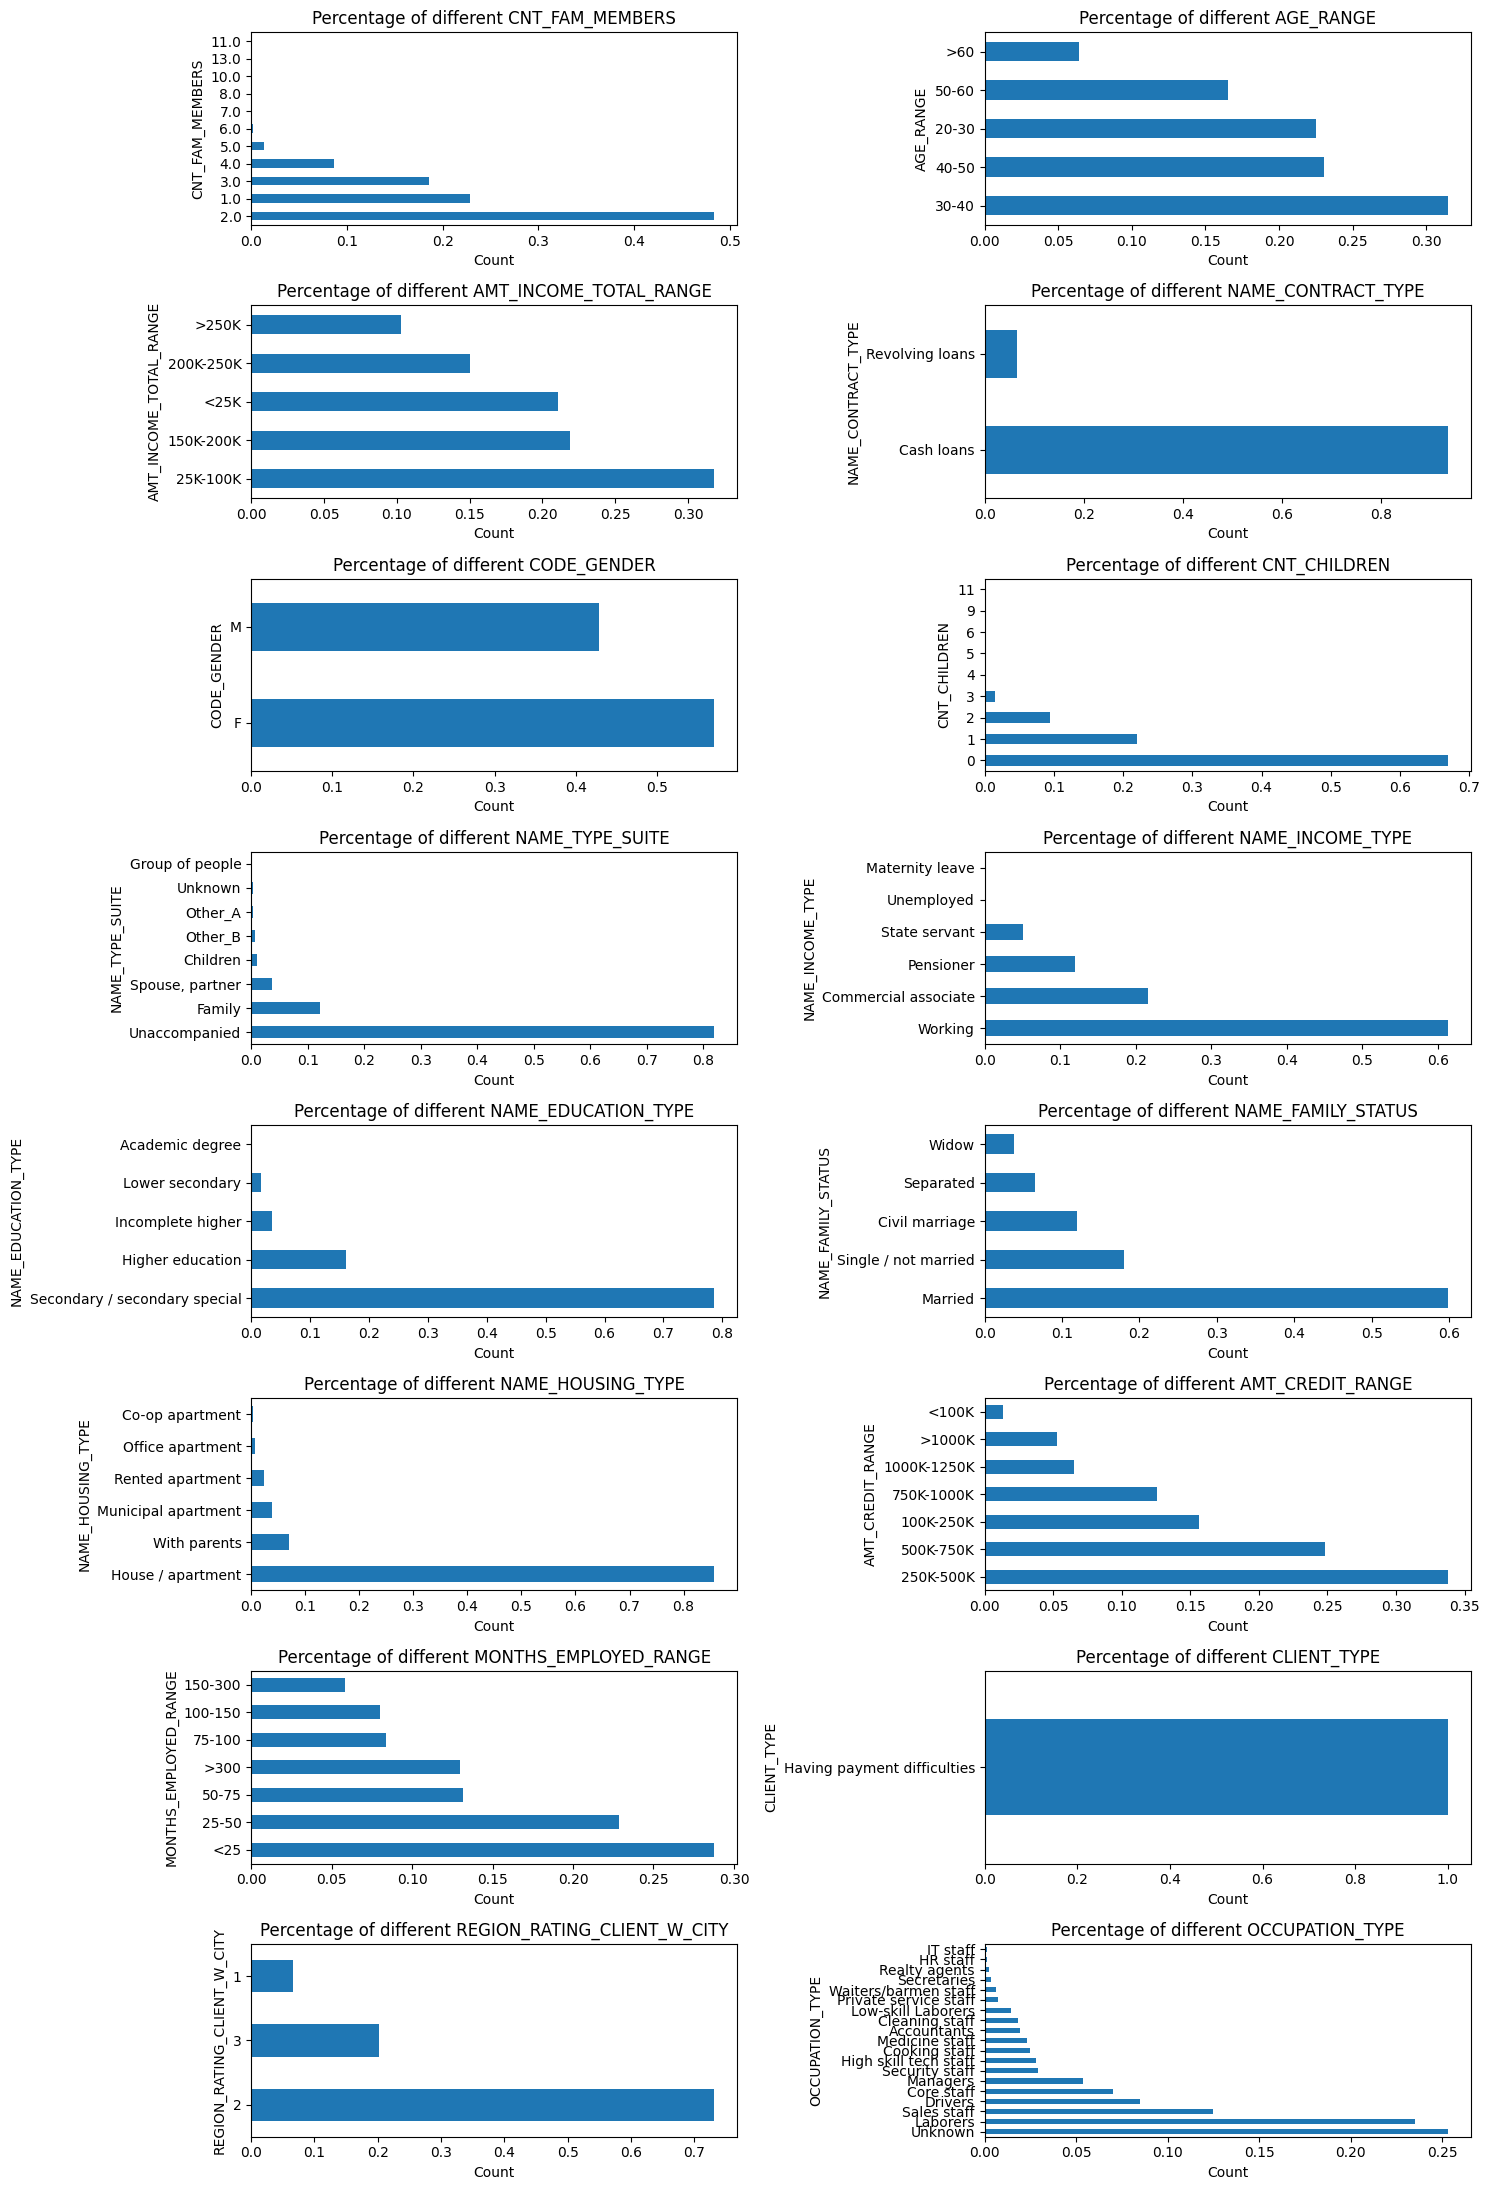

In [390]:
feature_cols = ['CNT_FAM_MEMBERS','AGE_RANGE','AMT_INCOME_TOTAL_RANGE','NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'AMT_CREDIT_RANGE' , 'MONTHS_EMPLOYED_RANGE', 'CLIENT_TYPE','REGION_RATING_CLIENT_W_CITY','OCCUPATION_TYPE']
plt.figure(figsize=[15,22])
cnt = 0
for col in feature_cols:
    cnt += 1
    # print(col)
    plt.subplot(8,2,cnt)
    if 'ORGANIZATION_TYPE' not in col:
        defaulters_data[col].value_counts(normalize=True).sort_values(ascending=False).plot.barh()            
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.title(f'Percentage of different {col}')
        # eda_toolkit.plt_category_count(defaulters_data,col,'h')
plt.tight_layout()
plt.show()        

## ➕ Merge the Application_Data with payment difficulties with their previous details
🔍 `SK_ID_CURR` in current application maps to `SK_ID_CURR` in previous application

In [391]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [392]:
eda_toolkit.get_desc_list('previous_application.csv',prev_app.columns)

Some Exception: 0


[('SK_ID_PREV', 'not found'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('NAME_CONTRACT_TYPE',
  'Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application'),
 ('AMT_ANNUITY', 'Annuity of previous application'),
 ('AMT_APPLICATION',
  'For how much credit did client ask on the previous application'),
 ('AMT_CREDIT',
  'Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT'),
 ('AMT_DOWN_PAYMENT', 'Down payment on the previous application'),
 ('AMT_GOODS_PRICE',
  'Goods price of good that client asked for (if applicable) on the previous application'),
 ('WEEKDAY_APPR_PROCESS_START',
  'On which day of the week did the client apply for previous application'),
 ('HOUR_APPR_PROCESS_START',
  'Approximately at what day hour did the client apply for the p

In [393]:
merged_data = prev_app.merge(defaulters_data,on='SK_ID_CURR',how='inner')

In [394]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [395]:
print(f'Prev_Data:{prev_app.shape}')
print(f'App_Data:{app_data.shape}')
print(f'Merged_Data:{merged_data.shape}')

Prev_Data:(1670214, 37)
App_Data:(307511, 40)
Merged_Data:(122360, 76)


💡 There are 1,22,360 applications in current loan application with `Payment Difficulties` who had previously taken applied for loan but where REJECTED
Breakup of rejection and reason is below

In [396]:
merged_data['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       91043
HC        17130
LIMIT      6000
SCO        3263
SCOFR      2276
CLIENT     1879
XNA         442
VERIF       285
SYSTEM       42
Name: count, dtype: int64

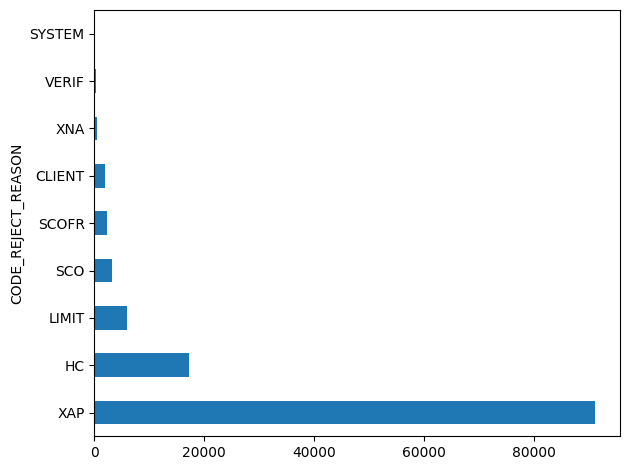

In [397]:
merged_data['CODE_REJECT_REASON'].value_counts().plot.barh()
plt.tight_layout()
plt.show()

#### 📖 Reject Reasons:
 - XAP: "Excess Applicable", meaning the loan amount requested exceeds the maximum limit set by the lender.
 - HC: "High Credit", indicating the applicant has a high credit score, which is usually a positive factor. 
 - LIMIT: Loan amount requested exceeds the lender's limit for the applicant.
 - SCOFR: "Scope" Loan application falls outside the scope of the lender's policies or services.
 - CLIENT:  Client not meeting the lender's criteria.
 - VERIF: "Verification", meaning there was an issue verifying the applicant's information or documents.
 - XNA: "X Not Applicable", rejection reason NA
 - SYSTEM: Indicates a system error or issue on the lender's end

#### 🔍 See the reject reason of the defaulters

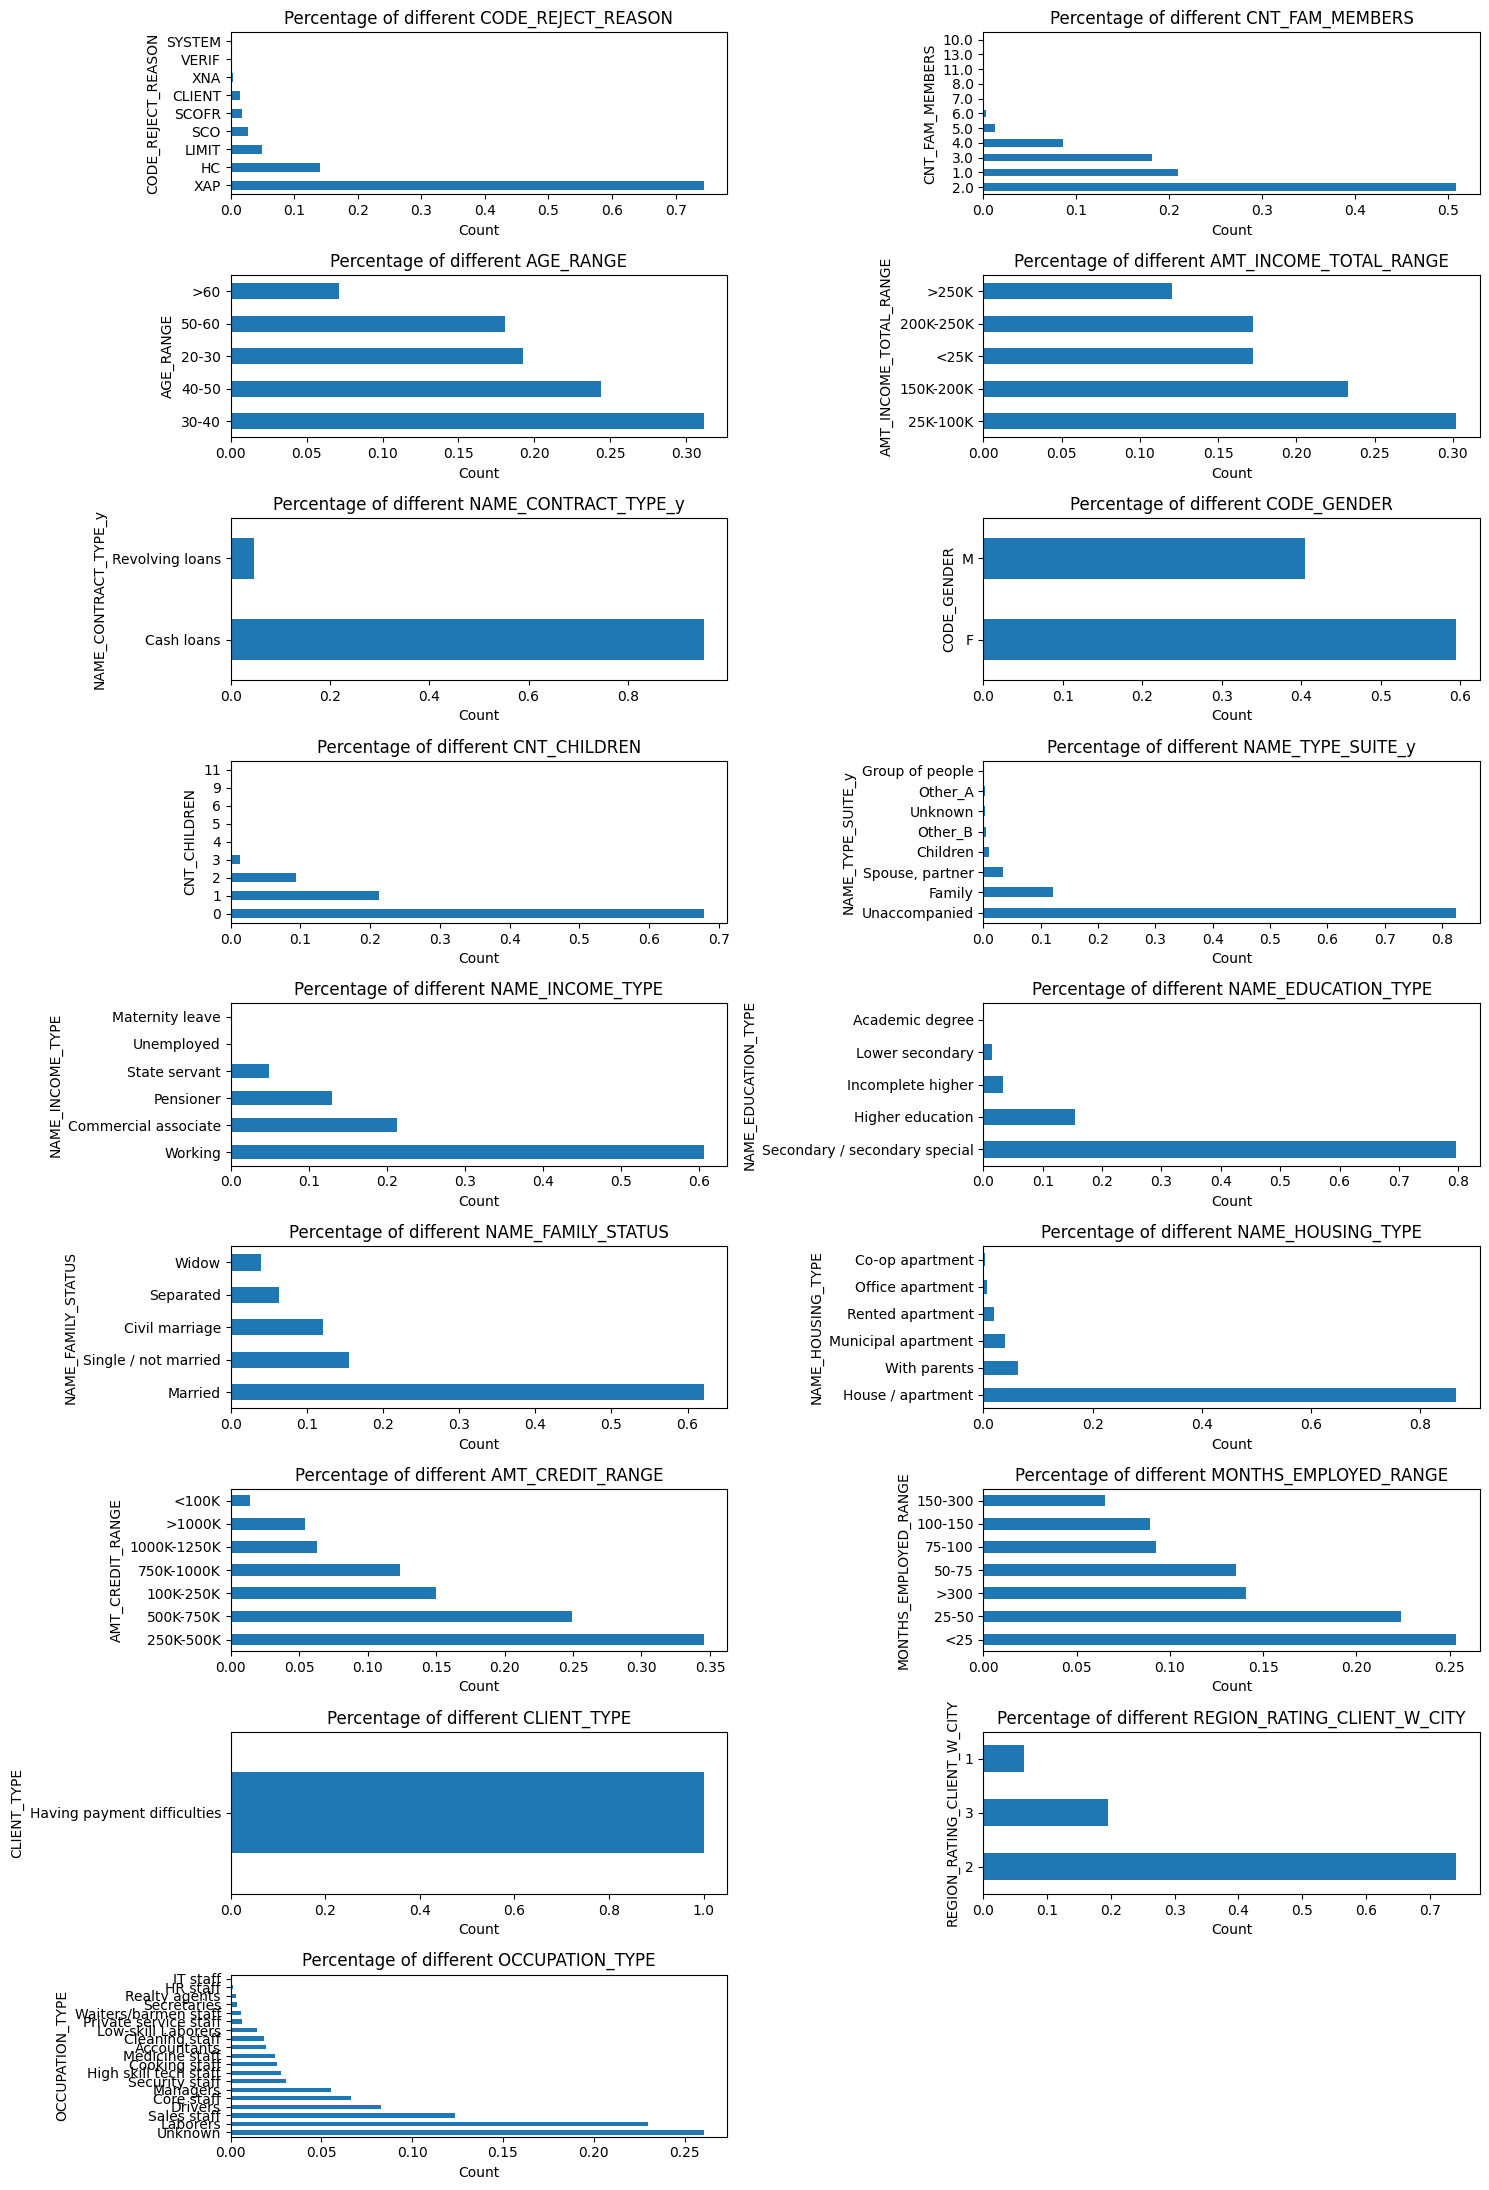

In [398]:
feature_cols = ['CODE_REJECT_REASON','CNT_FAM_MEMBERS','AGE_RANGE','AMT_INCOME_TOTAL_RANGE','NAME_CONTRACT_TYPE_y', 'CODE_GENDER',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE_y', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'AMT_CREDIT_RANGE' , 'MONTHS_EMPLOYED_RANGE', 'CLIENT_TYPE','REGION_RATING_CLIENT_W_CITY','OCCUPATION_TYPE']
plt.figure(figsize=[15,22])
cnt = 0
for col in feature_cols:
    cnt += 1
    # print(col)
    plt.subplot(9,2,cnt)
    if 'ORGANIZATION_TYPE' not in col:
        merged_data[col].value_counts(normalize=True).sort_values(ascending=False).plot.barh()            
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.title(f'Percentage of different {col}')
        # eda_toolkit.plt_category_count(defaulters_data,col,'h')
plt.tight_layout()
plt.show()    

💡 `MONTHS_EMLOYED_RANGE` - **<25 Months** are more likely to default followied by **25-50 Months**

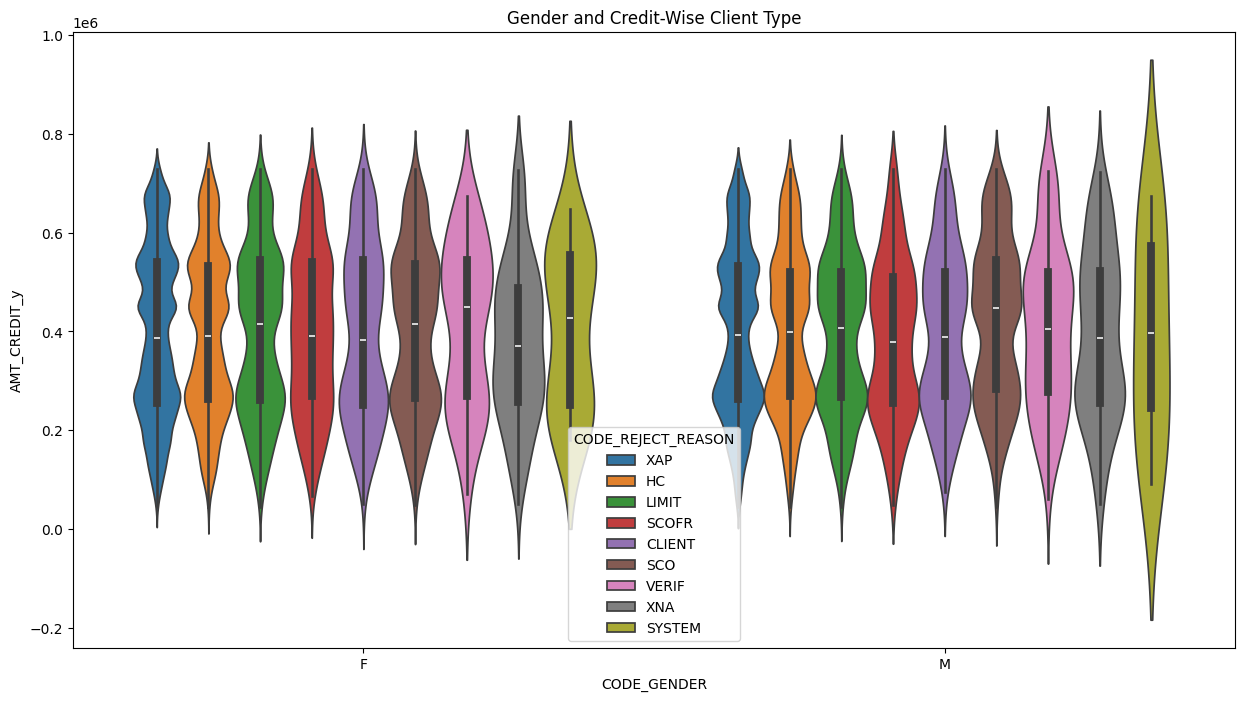

In [399]:
income_outlier = merged_data.AMT_CREDIT_y.quantile([0.75]).reset_index()['AMT_CREDIT_y'][0]
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT_y','TARGET','CLIENT_TYPE','CODE_GENDER','CODE_REJECT_REASON']
data1 = merged_data[(merged_data.AMT_CREDIT_y < income_outlier) & (merged_data.CODE_GENDER != 'XNA')]

plt.figure(figsize=[15,8])
sns.violinplot(data=data1,x='CODE_GENDER',y='AMT_CREDIT_y',hue='CODE_REJECT_REASON')
plt.title('Gender and Credit-Wise Client Type')
plt.show()

In [400]:
merged_data['CODE_REJECT_REASON'].value_counts(normalize=True)

CODE_REJECT_REASON
XAP       0.744059
HC        0.139997
LIMIT     0.049036
SCO       0.026667
SCOFR     0.018601
CLIENT    0.015356
XNA       0.003612
VERIF     0.002329
SYSTEM    0.000343
Name: proportion, dtype: float64

In [401]:
merged_data['CODE_REJECT'] = merged_data['CODE_REJECT_REASON'].replace({'XAP':0,'HC':1,'LIMIT':2,'SCO':3,'SCOFR':4,'CLIENT':5,'XNA':6,'VERIF':7,'SYSTEM':8})

In [402]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE',
       'AGE', 'AGE_RANGE', 'MONTHS_EMPLOYED', 'MONTHS_EMPLOYED_RANGE',
       'CLIENT_TYPE'],
      dtype='object')

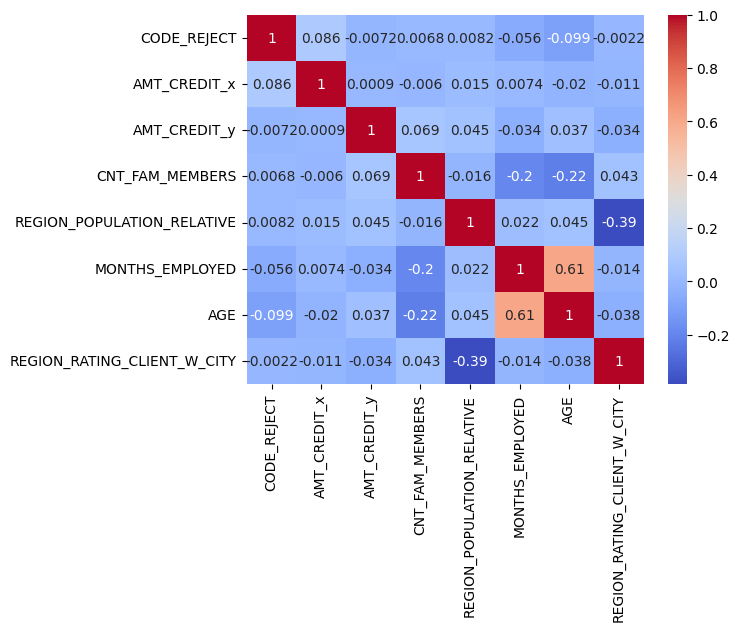

In [403]:
credit_outlier_x = merged_data.AMT_CREDIT_x.quantile([0.75]).reset_index()['AMT_CREDIT_x'][0]
credit_outlier_y = merged_data.AMT_CREDIT_y.quantile([0.75]).reset_index()['AMT_CREDIT_y'][0]

cols = ['CODE_REJECT','AMT_CREDIT_x','AMT_CREDIT_y','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE','MONTHS_EMPLOYED','AGE','REGION_RATING_CLIENT_W_CITY']
data1 = merged_data[(merged_data.AMT_CREDIT_x < credit_outlier_x) & ((merged_data.AMT_CREDIT_y < credit_outlier_y)) & (merged_data.CODE_GENDER != 'XNA')]
sns.heatmap(data1[cols].corr(),cmap ='coolwarm',annot=True)
plt.show()

In [404]:
merged_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)

AMT_CREDIT_RANGE
250K-500K      0.345358
500K-750K      0.249452
100K-250K      0.149984
750K-1000K     0.123488
1000K-1250K    0.063240
>1000K         0.054438
<100K          0.014041
Name: proportion, dtype: float64

## Summary of all insights:

### 💡Insights from the Univariate Analysis - Categorical Variables

💡`NAME_CONTRACT_TYPE`(Identification if loan is cash or revolving): **Cash Loans** makes the major chunk of loan contract type which is *almost 90%*

💡`CODE_GENDER`(Gender of the client): **Females** are the major loan takers with *> 60%*

💡`NAME_TYPE_SUITE`(Who was accompanying client when he was applying for the loan): *80%* of loanholders were **Unaccompanied** followed by *Family* and then *Spouse, Partners*

💡`NAME_INCOME_TYPE`(Clients income type (businessman, working, maternity leave,…)): Majority of loan holders are **Working** with *>50%*. This is followed by **Commercial** with *25%*

💡`NAME_EDUCATION_TYPE`(Level of highest education the client achieved): 70% of **Secondary/secondary special** taken loan. Which means education is inversely correlated to need for loan 

💡`NAME_FAMILY_STATUS`(Family status of the client): Loan product is popular in the **Married** people with *65%* of have taken loan. 

💡`NAME_HOUSING_TYPE`(What is the housing situation of the client (renting, living with parents, ...)): *80%* of the loan takers are in **Housing/Apartments**

💡`OCCUPATION_TYPE`(What kind of occupation does the client have): *~18%* of Loan is taken by **Laborers** and **IT Staff** makes very less percentage of the loan takers

💡`WEEKDAY_APPR_PROCESS_START`(On which day of the week did the client apply for the loan): **TUESDAY** is the popular day of the week to apply for Loan

🎯 `ORGANIZATION_TYPE` was not fitting the above sub-plot so is already taken care separately

### 💡Insights from the Bivariate Analysis = Categorical Vs Categorical

💡 Majority of the **Business Entities** favour **Cash loans** than **Revolving loans**. This might be mainly due to the fact that they have to meet their operational expenses month on month basis

### 💡 Insights of Univariate Analysis - Derived Column

💡 `AMT_INCOME_TOTAL_RANGE`: Close to 30% of the clients have income in the range of 25-100K

💡 `AMT_CREDIT_RANGE`: 29% of the clients are in the loan bracket of 250K-500K CREDIT AMOUNT

💡 `AGE_RANGE`: `30-40` is the popular age group for people applying for loans. Additionally `40-50` and `50-60` seems to be age group followed by it

💡 `MONTHS_EMPLOYED_RANGE`: Clients who are employed for less number of months (`<25` and `<25-50`) clearly shows were loan applicants, Contrarily clients employed for `>300` months were high in number with 20%

### 💡 Insights of Bi-Variate/Multi-Variate Analysis - Discrete vs Discrete
💡 `CNT_FAM_MEMBERS` and `CNT_CHILDREN` - are highly correlated which means number family are big due to number of children

💡 `LIVE_REGION_NOT_WORK_REGION` and`REG_REGION_NOT_WORK_REGION` - Most of the loans are taken by people who are working away from their permanent location

💡 `LIVE_REGION_NOT_WORK_CITY` and`REG_REGION_NOT_WORK_CITY` - Most of the loans are taken by people who are working away from their permanent city altogether

💡 `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `AMT_GOODS_PRICE` - Income of Client, Loan Amount and  Price of Goods (in case of consumer goods) are showing high positive correlation.

💡 `REGION_RATING_CLIENT` is inversely correlated to the `REGION_POPULATION_RELATIVE` - This means **residents of highly populated region are more likely to take Loan** Product. Same is the case with `REGION_RATING_W_CITY` and `REGION_POPULATION_RELATIVE`

## IV Presentation and Recommendations (10%)

### Meets expectations:

1. The presentation has a clear structure, is not too long, and explains the most important results concisely in simple language.
2. The recommendations to solve the problems are realistic, actionable and coherent with the analysis.
3. If any assumptions are made, they are stated clearly.


### Does not meet expectations:
1. The presentation lacks structure, is too long or does not put emphasis on the important observations. The language used is complicated for business people to understand.
2. The recommendations to solve the problems are either unrealistic, non-actionable or incoherent with the analysis.
3. Contains unnecessary details or lacks the important ones.
4. Assumptions made, if any, are not stated clearly.

## 🎯 Final Conclusion & Recommendations 🔚:

Based on above:

 - Bank should ✔️**Prefer** clients with *Occupation*: `IT Staff`, ❌**Avoid**: `Salesman` and `Laborers`
 - Major reason for *Rejection* have been `XAP` - which is `Excess Application` with 74% rejection. 
 - `Rating of the city` which is highly populated needs to be checked upfront as its highly correlated.
 - `Most defaulters` where having family members with `0 Children` and were `Not Staying with Parents`.
 - ✔️**Prefer**: Clients `Staying with parents`
 - ⚠️**Cautious**: Extra attention is required for age group range `30-40` and `40-50` as most of the defaults happen in this age category
 - ⚠️**Caution**: `MONTHS_EMLOYED_RANGE` - **<25 Months** are more likely to default followied by **25-50 Months**. Bank need to think on strategy while offering loans to this group



## V Conciseness and Readability of the code (10%)

### Meets expectations:
1. The code is concise and syntactically correct. Wherever appropriate, built-in functions and standard libraries are used instead of writing long code (if-else statements, for loops, etc.).
2. Custom functions are used to perform repetitive tasks.
3. The code is readable with appropriately named variables and detailed comments are written wherever necessary.

### Does not meet expectations:
1. Long and complex code used instead of shorter built-in functions.
2. Custom functions are not used to perform repetitive tasks resulting in the same piece of code being repeated multiple times.
3. Code readability is poor because of vaguely named variables or lack of comments wherever necessary.

#### Columns dropped from Application Data

In [405]:
len(eda_toolkit.columns_to_drop)

89

In [406]:
cols=pd.DataFrame(eda_toolkit.columns_to_drop)
cols
cols[1].value_counts()

1
Due to Missing Count exceeding threshold    49
Due to low correlation to Target Column     40
Name: count, dtype: int64

#### List of Category Columns

In [407]:
eda_toolkit.category_col_list

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

#### List of Non-Category Columns

In [408]:
eda_toolkit.non_category_col_list

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'TARGET']